----------------------------------
# Project: Cars4U - Supervised Learning - Josh Isaiah
----------------------------------

### Description
### Background & Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (**O**riginal **E**quipment **M**anufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

### Objective
1.	Explore and visualize the dataset.
2.	Build a linear regression model to predict the prices of used cars.
3.	Generate a set of insights and recommendations that will help the business.

### Data Dictionary 
1.	S.No. : Serial Number
2.	Name : Name of the car which includes Brand name and Model name
3.	Location : The location in which the car is being sold or is available for purchase Cities
4.	Year : Manufacturing year of the car
5.	Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6.	Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7.	Transmission : The type of transmission used by the car. (Automatic / Manual)
8.	Owner : Type of ownership
9.	Mileage : The standard mileage offered by the car company in kmpl (kilometer per litre) or km/kg (kilometer per kilogram)
10.	Engine : The displacement volume of the engine in CC (Cubic Centimeters).
11.	Power : The maximum power of the engine in bhp (Brake Horsepower).
12.	Seats : The number of seats in the car.
13.	New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14.	Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)


## Explorating Data Analysis

#### Problem Definition:
The background and context gives us a clear understanding of what is expected from the Used Cars data.  Our primary objective is to develop a Linear Regression Model that will help us effectively predict price of used cars after being trained with other features/columns as listed in the Data Dictionary. 
Additional information, like clarification of Units and acronyms has been added to the Data Dictionary to give us a better idea of what we are dealing with. Unit conversation will be carried out in the Feature Engineering steps while cleaning up the data.

Based on domain knowledge of cars, most of the features in the Data Dictionary are factors that are incorporated into pricing/buying a car either used or new. However, we will use the Model to make the necessary predictions.

Each step of the Model Development will be in a section.

**This is EDA not data preprocessing but we need to know what's going on in order to know how to prepare the data for whatever comes next.**

**Importing Necessary Libraries**

In [850]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
sns.set(color_codes=True) #add nice colorful background to the plots/graphs

import warnings
warnings.filterwarnings("ignore")

# To create linear regression model
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', None)

#### Load and explore the data

In [851]:
# In this section the goals are to load the data into python and then to check its basic properties. 
# This will include the dimension, column types and names, and missingness counts.
data=pd.read_csv('used_cars_data.csv') # load csv data into pandas dataframe
data.sample(15) #display 15 random rows from the loaded dataframe

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7131,7131,Volkswagen Polo 1.2 MPI Highline,Coimbatore,2016,22003,Petrol,Manual,First,16.2 kmpl,1199 CC,74 bhp,5.0,NaN,NaN
6483,6483,Maruti Swift VDI BSIV,Pune,2014,83000,Diesel,Manual,First,25.2 kmpl,1248 CC,74 bhp,5.0,NaN,NaN
1576,1576,Hyundai Grand i10 1.2 CRDi Sportz Option,Kolkata,2014,42277,Diesel,Manual,First,24.0 kmpl,1186 CC,73.97 bhp,5.0,NaN,3.85
4844,4844,Maruti Wagon R VXI 1.2,Kolkata,2014,37000,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.56 Lakh,2.80
320,320,Maruti Ertiga Paseo VXI,Mumbai,2018,18000,Petrol,Manual,First,16.02 kmpl,1373 CC,93.7 bhp,7.0,NaN,8.25
6389,6389,Tata Indigo CS eVX,Pune,2016,100000,Diesel,Manual,First,25.0 kmpl,1396 CC,69.01 bhp,5.0,NaN,NaN
6311,6311,Maruti Ertiga VDI,Kolkata,2013,42200,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,NaN
920,920,Tata Indigo eCS eLX BS IV,Delhi,2015,150000,Diesel,Manual,First,25.0 kmpl,1396 CC,69.01 bhp,5.0,NaN,2.50
2463,2463,Toyota Innova 2.5 GX (Diesel) 7 Seater,Delhi,2012,62000,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,7.0,NaN,7.75
3084,3084,Mahindra Scorpio S8 8 Seater,Delhi,2015,61000,Diesel,Manual,First,15.4 kmpl,2179 CC,120 bhp,8.0,NaN,9.50


In [852]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [853]:
# data.Mileage.head(200)
# data['Mileage'][data.Mileage.str.contains('kmpl',regex=False)==True].value_counts()
# data.New_Price.head(200)
# data['New_Price'][data.New_Price.str.contains('Lakh',regex=False)==True].value_counts().sum()
# data.info()
# data[['Power','Engine']][data['Power'].isna()==True]#.value_counts().sum()
# data[['Power','Engine']][data['Power'].isna()==True]#.nunique()



In [854]:
print('*********************** Data Info ***********************')
print(data.info())


print('\n','*********************** Data Shape (Rows, Columns) ***********************')
print(data.shape)
# print('\n',f'There are {data.shape[0]} rows and {data.shape[1]} columns.')  # f-string

*********************** Data Info ***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB
Non

In [855]:
# looking at which columns have the most missing values
print('*********************** Missing Values ***********************')
print(data.isna().sum().sort_values(ascending=False))

print('\n','*********************** Unique Values ***********************')
print(data.nunique())

*********************** Missing Values ***********************
New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

 *********************** Unique Values ***********************
S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64


In [856]:
# The Power and Engine have equal missing values in the Data.info() section. Code below will check if they appear is same
# row along with other features/columns
data[['Seats','Power','Engine']][data['Power'].isna()==True]
data[data['Power'].isna()==True]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,2.95
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,2.11
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,NaN,1.75
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,NaN,26.50
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,NaN,3.20
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,5.80
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.50
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,40.88
2074,2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,NaN,3.15
2096,2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,NaN,1.93


In [857]:
# Get statistical summary of all Numerical Features/Columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


**Looking at Price Summary Statistics with IQR**

In [858]:
# Use nanquantiles when you have NAN present in the column you are analyzing and quantile if there are no NAN
# Max. = Q3+1.5*IQR
# IQR = Q3-Q1; Q3 = np.nanquantile(data.Price,0.75), Q1 = np.nanquantile(data.Price,0.25)

# data['Price'][data.Price>(np.quantile(data.Price,0.75)+1.5*
#                           (np.quantile(data.Price,0.75)-np.quantile(data.Price,0.25)))].value_counts().sum()
# showing entries greater than the Max. 
data['Price'][data.Price>(np.nanquantile(data.Price,0.75)+1.5*
                          (np.nanquantile(data.Price,0.75)-np.nanquantile(data.Price,0.25)))].value_counts().sum()

data['Price'][data.Price>(np.nanquantile(data.Price,0.75)+1.5*
                          (np.nanquantile(data.Price,0.75)-np.nanquantile(data.Price,0.25)))]
data[data.Price>(np.nanquantile(data.Price,0.75)+1.5*
                          (np.nanquantile(data.Price,0.75)-np.nanquantile(data.Price,0.25)))]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
13,13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00
19,19,Mercedes-Benz New C-Class C 220 CDI BE Avantgare,Bangalore,2014,78500,Diesel,Automatic,First,14.84 kmpl,2143 CC,167.62 bhp,5.0,NaN,28.00
22,22,Audi A6 2011-2015 35 TFSI Technology,Mumbai,2015,55985,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,NaN,23.50
38,38,Mercedes-Benz M-Class ML 350 CDI,Pune,2013,85000,Diesel,Automatic,First,11.74 kmpl,2987 CC,254.8 bhp,5.0,NaN,28.00
50,50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,21.43
62,62,Mercedes-Benz New C-Class C 200 CGI Avantgarde,Delhi,2015,58000,Petrol,Automatic,First,11.74 kmpl,1796 CC,186 bhp,5.0,NaN,26.70
67,67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,49.14 Lakh,35.67
75,75,Audi A6 2.0 TDI Design Edition,Delhi,2014,56000,Diesel,Automatic,Second,18.53 kmpl,1968 CC,187.74 bhp,5.0,NaN,29.50
92,92,Audi A6 2011-2015 35 TDI Premium,Coimbatore,2018,48367,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,39.58
107,107,Jaguar XF 3.0 Litre S Premium Luxury,Hyderabad,2011,78000,Diesel,Automatic,Second,14.74 kmpl,2993 CC,270.9 bhp,5.0,NaN,24.00


**Identification of the Kilometers Driven Extreme Value**

In [859]:
# Car with the max. Kilometers Driven
data[data.Kilometers_Driven>=6500000]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.0


In [860]:
data[['Name','Kilometers_Driven','Year']][data.Name.str.contains('BMW X5 xDrive',regex=False)==True]#.sort_values(
   # by=data.Kilometers_Driven,ascending=False)
# data['New_Price'][data.New_Price.str.contains('Lakh',regex=False)==True]

,Name,Kilometers_Driven,Year
168,BMW X5 xDrive 30d,41000,2015
516,BMW X5 xDrive 30d,75000,2011
712,BMW X5 xDrive 30d Design Pure Experience 5 Seater,69000,2015
1941,BMW X5 xDrive 30d,66000,2012
2311,BMW X5 xDrive 30d,17738,2016
2328,BMW X5 xDrive 30d M Sport,6500000,2017
4101,BMW X5 xDrive 30d M Sport,45000,2016
4389,BMW X5 xDrive 30d,124652,2011
4417,BMW X5 xDrive 30d,58000,2011
4820,BMW X5 xDrive 30d,110000,2009


**Preliminary Observations**

- Some of the columns have the units (e.g.: CC, bhp, Lakh, kmpl, etc) attached to the data entry
- Name, Brand, and Trim of the cars are all combined in the Name column
- There are 7,253 entries (rows) and 14 features (columns)
- S. No., Year, and Kilometers_Driven are loaded as integers while Seats and Price are loaded as Float. The rest columns are objects/strings.  Looking at the Data summary, we will have to perform Feature Engineering and data type conversion
- The oldest model Year in the data is 1999 while the newest car model is a 2019 car
- There are a good number of missing values in the New_Price and Price columns.  The New_Price has more missing values.  We “might” have to drop this column, since what we are trying to model/predict is price of Used Cars not new cars.  Although, the New_Price will have been a good Feature to use in the model, however because there are so much missing data, we will model with and without the New_Price and see how the model performs.
- The number of missing values in Power ad Engine are equal, 46.  It was also confirmed that they have missing values in same rows/entries.  The Seat and New_Price also have missing values in same rows as the missing values for the Engine and Power.
- There are 11 Unique locations, 23 different Year models of cars, 5 Fuel Types, 4 different Owner Types, 9 Different Seating configurations, and 2 Transmission Types.  Most of these columns will be converted to categorical data type and possibly encoded before being used for the model
- Looking at the initial summary statistics, the columns we can currently review before Data Processing are the Kilometers Driven and the Price. 
    - Average Price is 9.47 with median price being 5.64 and max. 160.  The standard range shows that the Price is skewed to the right with 718 entries being greater than the Q3+1.5*IQR.  We cannot definitely say these are outliers because these prices might correspond to the car type being a luxury car, a newer model, a recent year, etc.
    - The average Kilometers Driven is ~59,000 with max. being 6.5M Km.  Based on domain knowledge, it is probably impossible to see a car with 6.5 million Km which is equivalent to 4 million miles.  We will probably drop this row or replace with a more reasonable mileage.  Digging deeper, we can see that it was a BMW X5 xDrive, made 2017 that has the 6.5M Km.  Comparing to same brand and model in the dataframe, we can conclude that this might be a typo. Original mileage was probably supposed to be 65,000 Km


In [861]:
# data.loc[2328,'Kilometers_Driven']

### Using visualization of the data to understand it better

**Univariate Analysis**

In [862]:
## Create columns to hold Object/String data types

# Object/String Data types
str_col = data.select_dtypes(include='object').columns.tolist()
print(str_col)

['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price']


In [863]:
## Create columns to hold Numeric and Non-numeric data types

# Numeric Data types
num_col = data.select_dtypes(include=np.number).columns.tolist()
num_col.remove('Year') # Remove Year, because it will be a Categorical column
print(num_col)
num_col.remove('S.No.') # Remove S. No column
print(num_col)

['S.No.', 'Kilometers_Driven', 'Seats', 'Price']
['Kilometers_Driven', 'Seats', 'Price']


**Histogram Plots for all Numerical Features**

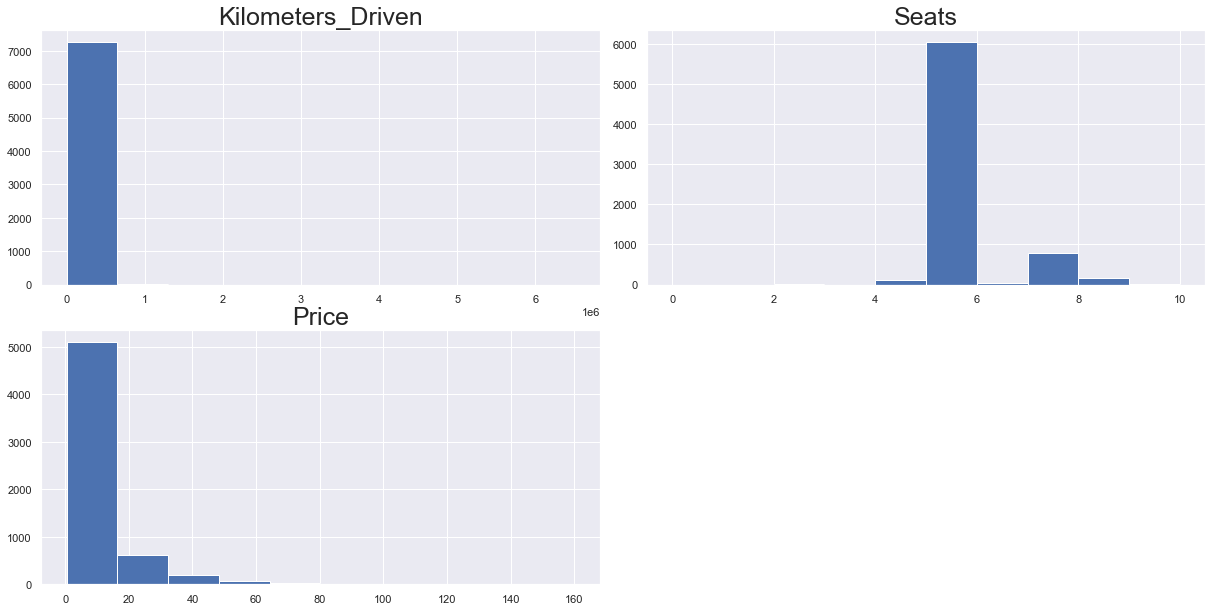

In [864]:
# Histogram Plots for all Numerical Features
# Using the numerical columns to perform the Histogram Plots
# num_col = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(17,75))

for i in range(len(num_col)):
    plt.subplot(18,2,i+1)
    plt.hist(data[num_col[i]])
#     sns.boxplot(data[num_col[i]])
#     sns.displot(data[num_col[i]], kde=True)
#     sns.countplot(data[num_col[i]])
    plt.tight_layout()
    plt.title(num_col[i],fontsize=25)
    
plt.show()

**Boxplot for all Numerical Features**

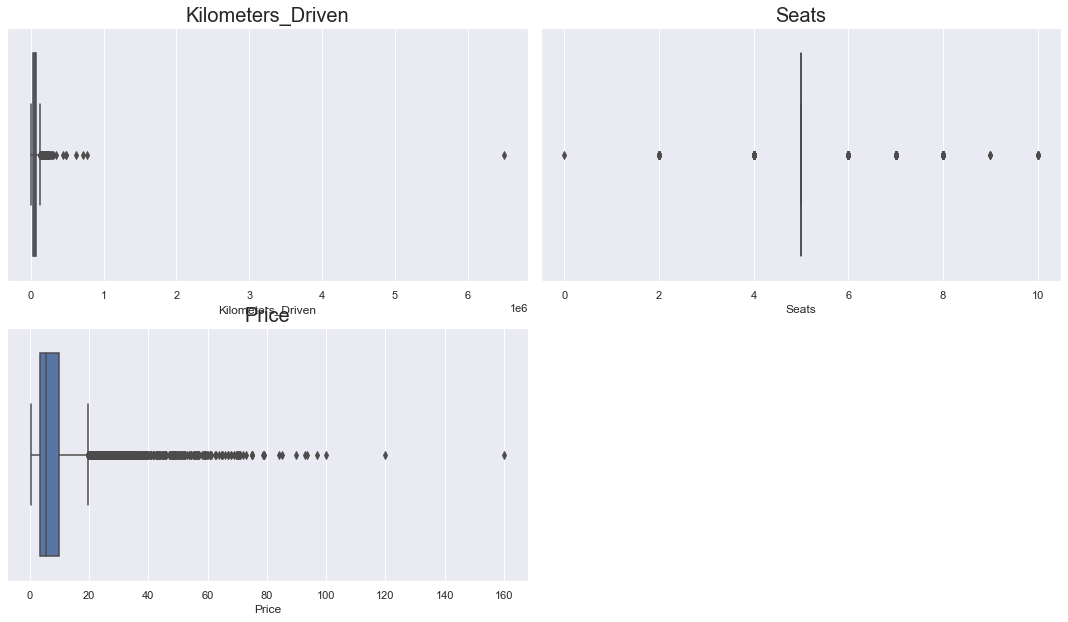

In [865]:
# Box Plots for all Numerical Features
# Using the numerical columns to perform the Box Plots
# num_col = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15,75))

for i in range(len(num_col)):
    plt.subplot(18,2,i+1)
#     plt.hist(data[num_col[i]])
    sns.boxplot(data[num_col[i]])
#     sns.displot(data[num_col[i]], kde=True)
#     sns.countplot(data[num_col[i]])
    plt.tight_layout()
    plt.title(num_col[i],fontsize=20)
    
plt.show()


**Countplots for all Categorical Features**

In [19]:
# Count Plots for all Categorical/String Features
# Using the String columns to perform the Count Plots
# str_col = data.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(15,75))

for i in range(len(str_col)):
    plt.subplot(18,1,i+1)
#     plt.hist(data[str_col[i]])
#     sns.boxplot(data[str_col[i]])
#     sns.displot(data[str_col[i]], kde=True)
    sns.countplot(data[str_col[i]])
    plt.tight_layout()
    plt.title(str_col[i],fontsize=20)
    
plt.show()


In [866]:
#display the total car sold/bought in each city
loc_col=data['Location'].unique()
loc_col
for i in loc_col:
    print(i,data['Location'][data['Location']==i].value_counts().sum())
    

Mumbai 949
Pune 765
Chennai 591
Coimbatore 772
Hyderabad 876
Jaipur 499
Kochi 772
Kolkata 654
Delhi 660
Bangalore 440
Ahmedabad 275


In [867]:
#display the total car sold/bought in by Fuel Type
fuel_col=data['Fuel_Type'].unique()

for j in fuel_col:
    print(j,data['Fuel_Type'][data['Fuel_Type']==j].value_counts().sum())

CNG 62
Diesel 3852
Petrol 3325
LPG 12
Electric 2


In [868]:
# x_col=data['Name'].unique()

# for k in x_col:
#     print(k,data['Name'][data['Name']==k].value_counts().sum())

In [869]:
# data[['Name','Fuel_Type']][data.Fuel_Type.str.contains('Diesel',regex=False)==True]#.value_counts().sum()

In [870]:
# data.groupby('Location').agg(['count'])

**Observations on Categorical Features Visualization:**
- The Count plot for Name shows how unorganized the Name column is.  We will have to clean it up so we can better visualize and perform analysis on it.  There are about 2,041 unique Names currently.  Most of these4 are possibly same name, but because the data is not structured, a single brand name might have been inputted as multiple names.
- Location, Owner Type Transmission and Fuel Types are the only Columns that appears to have some structure.
    - Location: Most of the cars are bought out of Mumbai, which should be expected, considering Mumbai is the capital and largest city in India.  It will be highly populated with people choosing to drive used cars to their workplace, school, etc. instead of taking public transportation. Next highest location where the used cars are sold/bought is Hyderabad with total of 876 cars.  From research Hyderabad is a city with lots of Technology industry.  Also, has lots of upscale restaurants and shops.  These features could explain why there are lots of used cars being traded. The least sales are in the city of Ahmedabad with 275 total sales.
    - Fuel Type: There 5 different fuel types.  Diesel has the highest which is 3,852.  One would expect Petrol to be the highest, however the data does show that Diesel is the highest. It will be interesting to see which brand has the highest number of Diesel engines.  Petrol is next with 3,325 with Electric car coming with the least.  Electric cars are new, and the market is still growing, this could explain why there is not many entries. Also, owners of Electric cars are not common in the used car market.
    - Owner Type: More first-time owners when compared to second, third, and fourth and above. This might be that first time owners like to trade their cars in for newer models.
    - Transmission: This shows that there are more manual transmission engines in India than automatic.  This could also point to the fact that older generations still purchase more cars.


### Bivariate Analysis

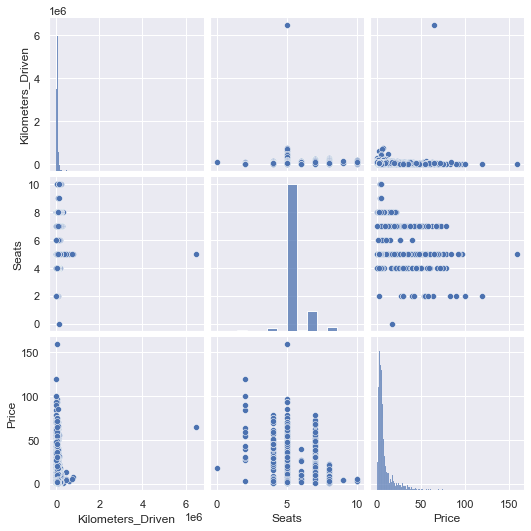

In [871]:
sns.pairplot(data[num_col]);

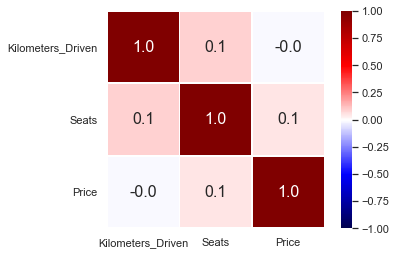

In [872]:
sns.heatmap(data[num_col].corr(),cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=True, linewidths=.7,annot_kws={'size':16});

In [873]:
data[num_col].corr()

,Kilometers_Driven,Seats,Price
Kilometers_Driven,1.000000,0.090221,-0.011493
Seats,0.090221,1.000000,0.052225
Price,-0.011493,0.052225,1.000000


**Observations on Bivariate Analysis:**
- Because the dataset needs to be cleanup, we can not see any correlation between the numeric columns.  We also need to convert most of the object/string columns back to numeric and perform a proper correlation analysis


# Data Preprocessing (Feature Engineering, Variable Transformations, etc)

In [874]:
data.sample(15)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5896,5896,Toyota Etios V,Kochi,2017,27100,Petrol,Manual,First,16.78 kmpl,1496 CC,88.73 bhp,5.0,NaN,6.37
5464,5464,Mahindra Scorpio S10 7 Seater,Kochi,2018,27395,Diesel,Manual,First,15.4 kmpl,2179 CC,120 bhp,7.0,NaN,14.19
7000,7000,Mitsubishi Pajero Sport 4X2 AT,Ahmedabad,2014,75000,Diesel,Automatic,First,13.5 kmpl,2477 CC,175.56 bhp,7.0,32.41 Lakh,NaN
5942,5942,Ford Endeavour 2.5L 4X2 MT,Jaipur,2011,119000,Diesel,Manual,Third,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.50
5674,5674,Skoda Octavia Elegance 1.8 TSI AT,Kochi,2017,30523,Petrol,Automatic,First,14.7 kmpl,1798 CC,177.5 bhp,5.0,NaN,17.08
244,244,Toyota Innova 2.5 V Diesel 7-seater,Mumbai,2014,118000,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,NaN,10.75
5536,5536,Honda City 1.5 V AT,Kolkata,2015,45000,Petrol,Automatic,First,16.8 kmpl,1497 CC,118 bhp,5.0,NaN,5.25
207,207,Toyota Etios Liva GD SP,Delhi,2014,104000,Diesel,Manual,First,23.59 kmpl,1364 CC,67.06 bhp,5.0,NaN,3.00
7080,7080,Honda Jazz 1.2 V CVT i VTEC,Coimbatore,2018,36611,Petrol,Automatic,First,19.0 kmpl,1199 CC,88.7 bhp,5.0,NaN,NaN
3050,3050,Tata Indica Vista Aqua 1.3 Quadrajet,Jaipur,2009,117000,Diesel,Manual,First,18.0 kmpl,1248 CC,75 bhp,5.0,NaN,1.10


In [875]:
df=data.copy() #make a copy of the data that we will be cleaning for the Data preprocessing

In [876]:
df.set_index('S.No.',inplace=True) # switch the index to S.No.
df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2190,Mercedes-Benz E-Class E250 CDI Launch Edition,Kochi,2016,46936,Diesel,Automatic,First,13.0 kmpl,2143 CC,204 bhp,5.0,NaN,29.60
1808,Toyota Innova 2.5 GX (Diesel) 7 Seater,Kochi,2013,62162,Diesel,Manual,First,12.99 kmpl,2494 CC,100 bhp,7.0,NaN,8.31
6256,Mahindra Thar CRDe AC,Hyderabad,2016,20000,Diesel,Manual,First,16.55 kmpl,2498 CC,105 bhp,6.0,NaN,NaN
3504,Maruti Alto 800 2016-2019 LXI,Kolkata,2013,24027,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,2.01
1059,Hyundai Santro Xing GL,Hyderabad,2010,58163,Petrol,Manual,First,0.0 kmpl,1086 CC,62 bhp,5.0,NaN,2.45
6726,Skoda Rapid 1.5 TDI Ambition,Pune,2015,82799,Diesel,Manual,First,21.14 kmpl,1498 CC,103.52 bhp,5.0,NaN,NaN
5057,Volkswagen Polo 1.2 MPI Comfortline,Ahmedabad,2013,39000,Petrol,Manual,First,16.47 kmpl,1198 CC,74 bhp,5.0,NaN,3.75
2418,Mercedes-Benz B Class B200 CDI,Coimbatore,2017,43812,Diesel,Automatic,First,15.0 kmpl,2143 CC,107.3 bhp,5.0,NaN,20.28
7172,Mercedes-Benz GLA Class 200 CDI SPORT,Coimbatore,2016,49398,Diesel,Automatic,First,17.9 kmpl,2143 CC,136 bhp,5.0,NaN,NaN


**Splitting the Name Column to Brand and Model**

In [877]:
# reviewing the Name column, the first word is the Brand, while the rest respresent the Model. We will Extract both
# and create two new columns, Brand and Model

BM= df["Name"].str.split(" ", n = 1, expand = True) 
BM.sample(10)

,0,1
S.No.,,
1890,Honda,Jazz 1.2 S i VTEC
1266,Maruti,Alto K10 2010-2014 VXI
1982,Honda,Accord 2.4 A/T
4552,BMW,3 Series 320d Sedan
510,Skoda,Fabia 1.6 MPI Elegance
1717,Mahindra,Xylo D4
6722,Ford,Figo Diesel LXI
5915,Chevrolet,Enjoy Petrol LS 7 Seater
5271,Maruti,Celerio ZXI Optional AMT


In [878]:
# BM[1]

In [879]:
df.drop(['Name'],axis=1,inplace=True) #drop the original Name column
df['Brand']=BM[0] #passing index 0, Brand from the BM dataframe to the main df dataframe
df['Model']=BM[1] #passing index 1, Model from the BM dataframe to the main df dataframe

del BM #freeing memory space

In [880]:
df.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


In [881]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


**Fixing Extreme values in Kilometers Driven**

In [882]:
# Car with the max. Kilometers Driven
df[data.Kilometers_Driven>=6500000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.0,BMW,X5 xDrive 30d M Sport


In [883]:
df[['Brand','Model','Kilometers_Driven','Year']][df.Model.str.contains('X5 xDrive',regex=False)==True]

,Brand,Model,Kilometers_Driven,Year
S.No.,,,,
168,BMW,X5 xDrive 30d,41000,2015
516,BMW,X5 xDrive 30d,75000,2011
712,BMW,X5 xDrive 30d Design Pure Experience 5 Seater,69000,2015
1941,BMW,X5 xDrive 30d,66000,2012
2311,BMW,X5 xDrive 30d,17738,2016
2328,BMW,X5 xDrive 30d M Sport,6500000,2017
4101,BMW,X5 xDrive 30d M Sport,45000,2016
4389,BMW,X5 xDrive 30d,124652,2011
4417,BMW,X5 xDrive 30d,58000,2011


In [884]:
df['Kilometers_Driven'][df.Model.str.contains('X5 xDrive',regex=False)==True].mean()

554876.1538461539

Observation:

As observed previously, the 2017 BMW xDrive 30d M Sport was the car with the extreme mileage value of 65,000,000 Km. Drilling the column down further, we see that similar Brand and Model are in the xx,000 mileage range.  Also, the average mileage of similar brand and model is 55,000 Km.  It could be that the 65,000,000 Km is a typo, however we cannot tell. Looking closely, it does look like the entry was supposed to be 65,000 Km.  We will replace this entry with 65,000 Km

In [885]:
df.loc[2328,'Kilometers_Driven']=65000 
#fix extreme value of Kilometers_Driven by replacing the 65,000,000 Km with 65,000 Km

In [886]:
# display Kilometers after fix
df[['Brand','Model','Kilometers_Driven','Year']][df.Model.str.contains('X5 xDrive',regex=False)==True]

,Brand,Model,Kilometers_Driven,Year
S.No.,,,,
168,BMW,X5 xDrive 30d,41000,2015
516,BMW,X5 xDrive 30d,75000,2011
712,BMW,X5 xDrive 30d Design Pure Experience 5 Seater,69000,2015
1941,BMW,X5 xDrive 30d,66000,2012
2311,BMW,X5 xDrive 30d,17738,2016
2328,BMW,X5 xDrive 30d M Sport,65000,2017
4101,BMW,X5 xDrive 30d M Sport,45000,2016
4389,BMW,X5 xDrive 30d,124652,2011
4417,BMW,X5 xDrive 30d,58000,2011


**Replace the units, suffixes bhp and CC in the Engine and Power Columns with ' ' and convert to floats**

In [887]:
df['Power'].head()

S.No.
0    58.16 bhp
1    126.2 bhp
2     88.7 bhp
3    88.76 bhp
4    140.8 bhp
Name: Power, dtype: object

In [888]:
# dpf=df.copy()
# dpf.head()

In [889]:
# Remove the suffix (bhp) in Power and replace with ''
def power_clean(power):
    """In the power column I'm replacing the terminal 'bhp' with
    the empty string. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(power, str):
        return power.replace('bhp', '')
    elif isinstance(power, (float,int)):  # checks if `power` is a number:
        return power
    else:
        return np.nan
#     return x

In [890]:
# dpf.Power.dtypes
# dpf.loc[76,'Power']

In [891]:
# df.loc[76,:]

In [892]:
# dpf['Power'] = pd.to_numeric(dpf['Power'].apply(power_clean),errors='coerce') 
# # #use the function and convert to float and use errors='coerce to convert errors into NAN'
# dpf.head()

In [893]:
df['Power'] = pd.to_numeric(df['Power'].apply(power_clean),errors='coerce') 
#use the function and convert to float and use errors='coerce to convert errors into NAN'
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


In [894]:
# Remove the suffix (CC) in Engine and replace with ''
def engine_clean(engine):
    """In the Engine column I'm replacing the terminal 'CC' with
    the empty string. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(engine, str):
        return engine.replace('CC', '')
    elif isinstance(engine, (float,int)):  # checks if `engine` is a number: 
        return engine
    else:
        return np.nan

In [895]:
# dpf['Engine'] = pd.to_numeric(dpf['Engine'].apply(engine_clean),errors='coerce') 
# #use the engine_clean function and convert to float, use errors='coerce to convert errors into NAN'
# dpf.head()

In [896]:
df['Engine'] = pd.to_numeric(df['Engine'].apply(engine_clean),errors='coerce') 
#use the engine_clean function and convert to float, use errors='coerce to convert errors into NAN'
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


In [897]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   object 
 7   Engine             7207 non-null   float64
 8   Power              7078 non-null   float64
 9   Seats              7200 non-null   float64
 10  New_Price          1006 non-null   object 
 11  Price              6019 non-null   float64
 12  Brand              7253 non-null   object 
 13  Model              7253 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.1+ MB


**Unit Conversion for Mileage**

From research, India reports mileage usage in kmpl (kilometer per liter).  We will use a multiplier of 1 for all entries with kmpl and convert km/kg to kmpl

In [898]:
#checking how many entries have km/kg, kmpl and null
print(df['Mileage'][df.Mileage.str.contains('km/kg',regex=False)==True].value_counts().sum())
print(df['Mileage'][df.Mileage.str.contains('kmpl',regex=False)==True].value_counts().sum())
print(df['Mileage'].isnull().sum())
print(df['Mileage'][df.Mileage.str.contains('km/kg',regex=False)==True].value_counts().sum()+
     df['Mileage'][df.Mileage.str.contains('kmpl',regex=False)==True].value_counts().sum()+
     df['Mileage'].isnull().sum())


74
7177
2
7253


In [899]:
def mileage_to_num(mileage):
    """This function takes in a string representing mileage in kmpl and km/kg
    and converts it to a number. 
    The km/kg will be converted to mpg first, then the mpg will be converted to kmpl.
    1 km/kg = 0.0016747
    1 mpg = 0.42514370749052 km/l
    1 km/kg = 
    (Sources: 
    - https://math.stackexchange.com/questions/1141752/how-to-convert-kilometers-kilogram-km-kg-to-miles-gallon-mpg
    - https://www.unitjuggler.com/convert-fuelconsumption-from-mpg-to-kmperl.html
    
    If the input is already numeric or null/NaN, this function just returns np.nan."""
    if isinstance(mileage, str):  # checks if `mileage` is a string
        multiplier = 1  # handles K vs M salaries
        if mileage.endswith('kmpl'):
            multiplier = 1
        elif mileage.endswith('km/kg'):
            multiplier = 0.0007119881669343739
        return float(mileage.replace('kmpl', '').replace('km/kg', '')) * multiplier
    elif isinstance(mileage, (float,int)):  # checks if `mileage` is a number: 
        return mileage
    else:  # this happens when the current mileage is np.nan
        return np.nan

In [900]:
# dpf.head()

In [901]:
# # 0.0016747*0.42514370749052
# dpf['Mileage']=dpf['Mileage'].apply(mileage_to_num)
# dpf.head()

In [902]:
# 0.0016747*0.42514370749052
df['Mileage']=df['Mileage'].apply(mileage_to_num)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,0.018939,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


In [903]:
print(df.Mileage.dtype) #check to confirm that Mileage is converted
print(df.Mileage.isnull().sum()) #check the null values in Mileage
df[df.Mileage.isnull()] # show the entries with Null values for mileage

float64
2


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
4446,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58 Lakh,13.00,Mahindra,E Verito D4
4904,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,Toyota,Prius 2009-2016 Z4


In [904]:
print(df['Model'][df.Model.str.contains('E Verito',regex=False)==True])
df['Model'][df.Model.str.contains('Prius',regex=False)==True]

S.No.
4446    E Verito D4
Name: Model, dtype: object


S.No.
4904    Prius 2009-2016 Z4
Name: Model, dtype: object

**Observation**
- The Null Mileage entries are both the Electric cars, Prius and E Verito. Drilling down further into the data shows that only there are only 1 entry for each of these models with missing values.  We do not have enough information to compare to like we did with the BMW X5 with 6.5M Mileage. We will drop these two entries.

In [905]:
# # dpf.drop()
# dpf.drop(dpf.index[[4446,4904]],inplace=True)
# dpf['Model'][dpf.Model.str.contains('E Verito',regex=False)==True]
# dpf[dpf.Mileage.isnull()]#.sum()

In [906]:
df.drop(df.index[[4446,4904]],inplace=True) # OR df.drop([4446,4904],axis="index") drop multiple rows
df['Model'][df.Model.str.contains('E Verito',regex=False)==True]
df[df.Mileage.isnull()]#.sum() #check to make sure the rows are dropped

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
S.No.,,,,,,,,,,,,,,


**New Price Conversion**

Observation:

Drilling through the New_Price column, there are two different units, Lakh and Cr.
Lakh seems to be more, so i will use a multiplier of 1 for Lakh and convert the Cr to its Lakh equivalent.
The number of missing entries in the New Price is 6,247. This is a lot of entries and the New Price feature has the highest missing entries.  I will drop this column eventually for the model, however, i will proceed to perform the conversion just in case i want to run the model with the New Price included later on

In [907]:
# data[data['New_Price'].isna()==False].sum()
print(data.New_Price.isna().sum())
print(df.New_Price.isna().sum())
print(data.New_Price.notnull().sum())
print(df.New_Price.notnull().sum())

6247
6246
1006
1005


In [908]:
# df[df.New_Price.notnull()]

In [909]:
# data[data.New_Price.notnull()]

In [910]:
df.New_Price.sort_values(ascending=False)

S.No.
5009    99.92 Lakh
418     95.38 Lakh
2767    95.13 Lakh
264     95.13 Lakh
3268    95.13 Lakh
1830    95.13 Lakh
1690    95.13 Lakh
5118    95.13 Lakh
134     95.04 Lakh
4527    92.79 Lakh
2319     92.5 Lakh
6964    92.01 Lakh
1583    91.38 Lakh
2808    91.23 Lakh
4695     9.99 Lakh
5310     9.97 Lakh
119      9.96 Lakh
2443     9.96 Lakh
6400     9.94 Lakh
6005     9.93 Lakh
5059     9.89 Lakh
5291     9.83 Lakh
1544     9.79 Lakh
2120     9.78 Lakh
5079     9.78 Lakh
417      9.74 Lakh
2722     9.72 Lakh
4934     9.62 Lakh
2414     9.58 Lakh
2922     9.58 Lakh
4998     9.56 Lakh
5260     9.55 Lakh
6758     9.54 Lakh
942      9.53 Lakh
117      9.51 Lakh
6437     9.51 Lakh
5828     9.51 Lakh
1317      9.5 Lakh
3226     9.48 Lakh
5534     9.47 Lakh
2397     9.47 Lakh
4978     9.47 Lakh
1094     9.46 Lakh
6352     9.45 Lakh
1704     9.44 Lakh
6381     9.42 Lakh
2079      9.4 Lakh
6086      9.4 Lakh
5434     9.36 Lakh
6049     9.27 Lakh
6760     9.26 Lakh
1547     9.26 Lakh
1494  

In [911]:
def newprice_to_num(newprice):
    """This function takes in a string representing New Price in Lakh and Cr
    and converts it to a number. 
   1 Lakh Rupees is equivalent to 100,000 Rupees
   1 Cr = 10,000,000 Rupees, which is same as 100 Lakh 
    (Sources: 
    - https://en.wikipedia.org/wiki/Lakh
    - https://en.wikipedia.org/wiki/Crore
    If the string contains Lakh, Multiplier will be 1, if it has Cr. Multiplier will be 100
    If the input is already numeric or null/NaN, this function just returns np.nan."""
    if isinstance(newprice, str):  # checks if `mileage` is a string
        multiplier = 1  # handles K vs M salaries
        if newprice.endswith('Lakh'):
            multiplier = 1
        elif newprice.endswith('Cr'):
            multiplier = 100
        return float(newprice.replace('Lakh', '').replace('Cr', '')) * multiplier
    elif isinstance(newprice, (float,int)):  # checks if `mileage` is a number: 
        return newprice
    else:  # this happens when the current mileage is np.nan
        return np.nan

In [912]:
# dpf.head()

In [913]:
 df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,0.018939,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


In [914]:
# dpf['New_Price']=dpf['New_Price'].apply(newprice_to_num)
# dpf.head()

In [915]:
df['New_Price']=df['New_Price'].apply(newprice_to_num)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
S.No.,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,0.018939,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz V
3,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


In [916]:
# print(dpf.New_Price.notnull().sum())
# print(dpf.New_Price.isnull().sum())
# print(dpf.shape)

In [917]:
print(df.New_Price.notnull().sum()) #check the number of Non Nulls in New_Price
print(df.New_Price.isnull().sum()) #check the number of  Nulls in New_Price
print(df.shape)   #check the shape of the dataframe

1005
6246
(7251, 14)


In [918]:
df.New_Price.dtypes #confirm that the data type is now float
# Let's continue cleaning up the data, the New_Price will be dropped later.
# df.drop(['New_Price'], axis='columns')

dtype('float64')

In [919]:
# dpf.Model.nunique()

**Binning of Years Column**
- Although it is suggested to Binned the Brand feature, we will perform the binning on the Year continuous feature and convert the Brand and 

In [920]:
# dpf.Year.describe()#.sort_values(ascending=False)

In [921]:
df.Year.describe()#.sort_values(ascending=False)

count    7251.000000
mean     2013.365329
std         3.254604
min      1996.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

In [922]:
# # Binning Years and adding labels
# width=4
# minyr=dpf.Year.min()
# dpf['Year_Binned'] = pd.cut(dpf['Year'], [minyr,minyr+width,minyr+2*width,minyr+3*width,minyr+4*width,
#                                  minyr+5*width,minyr+6*width],
#                   labels = ["1996 - 2000", "2000 - 2004", "2004 - 2008", "2008 - 2012", "2012 - 2016","2016 - 2020"])

# print(dpf['Year_Binned'].value_counts(dropna=False))

In [923]:
# Binning Years and adding labels
width=4
minyr=df.Year.min()
df['Year_Binned'] = pd.cut(df['Year'], [minyr,minyr+width,minyr+2*width,minyr+3*width,minyr+4*width,
                                 minyr+5*width,minyr+6*width],
                  labels = ["1996 - 2000", "2000 - 2004", "2004 - 2008", "2008 - 2012", "2012 - 2016","2016 - 2020"])

print(df['Year_Binned'].value_counts(dropna=False))

2012 - 2016    3530
2008 - 2012    1927
2016 - 2020    1189
2004 - 2008     512
2000 - 2004      81
1996 - 2000      11
NaN               1
Name: Year_Binned, dtype: int64


In [924]:
# dpf.head(3)

In [925]:
df.head(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,0.018939,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG,2008 - 2012
1,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,2012 - 2016
2,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz V,2008 - 2012


In [926]:
# #drop the year column
# dpf.drop(['Year'], axis='columns', inplace=True)
# dpf.head(3)

In [927]:
#drop the year column
df.drop(['Year'], axis='columns', inplace=True)
df.head(3)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,,
0,Mumbai,72000,CNG,Manual,First,0.018939,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG,2008 - 2012
1,Pune,41000,Diesel,Manual,First,19.670000,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option,2012 - 2016
2,Chennai,46000,Petrol,Manual,First,18.200000,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz V,2008 - 2012


**Seats Feature Data Preprocessing**
- This will be a categorical variable, however i will clean it up before conversion


In [928]:
df.Seats.describe()

count    7198.000000
mean        5.279800
std         0.811759
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [929]:
print('Number of Null/missing Seating capacity',df.Seats.isnull().sum())
print('Number of Unique models with missing Seating capacity',df['Model'][df.Seats.isnull()].nunique())

Number of Null/missing Seating capacity 53
Number of Unique models with missing Seating capacity 28


In [930]:
df[['Brand','Model']][df.Seats.isnull()]

,Brand,Model
S.No.,,
194,Honda,City 1.5 GXI
208,Maruti,Swift 1.3 VXi
229,Ford,Figo Diesel
733,Maruti,Swift 1.3 VXi
749,Land,Rover Range Rover 3.0 D
1294,Honda,City 1.3 DX
1327,Maruti,Swift 1.3 ZXI
1385,Honda,City 1.5 GXI
1460,Land,Rover Range Rover Sport 2005 2012 Sport


In [931]:
#All Models with missing seating capacity
xf=df[['Brand','Model','Seats']][df.Seats.isnull()]
print(xf.Model.value_counts())

Swift 1.3 VXi                              8
5 Series 520d Sedan                        7
Santro GLS II - Euro II                    4
Estilo LXI                                 3
City 1.5 GXI                               3
Rover Range Rover 3.0 D                    2
Swift 1.3 LXI                              2
Punto 1.4 Emotion                          2
Santro Xing XG                             2
Etios Liva V                               2
Punto 1.2 Dynamic                          1
City 1.3 DX                                1
City 1.5 EXI                               1
Jazz Select Edition                        1
Punto 1.3 Emotion                          1
Swift 1.3 ZXI                              1
Endeavour Hurricane LE                     1
Wagon R Vx                                 1
CR-V AT With Sun Roof                      1
i20 new Sportz AT 1.4                      1
TUV 300 P4                                 1
Figo Diesel                                1
Etios Liva

**Observation of Missing Seats**
- Looking up the models with missing seats in Google, only 2 models have seating capacity greater than 5. The Ford Endevour and the Mahindra TUV 300 P4. I will manually replace these rows with their corresponding seating capactity. Afterwards, i will replace the rest missing Seats with 5

In [932]:
# dpf.loc[3800,'Seats']=7 #fix Missing Seat for Ford Endevour Model
# dpf.loc[6633,'Seats']=5  #fix Missing Seat for Mahindra TUV 300 Brand/Model
# print('Number of Null/missing Seating capacity',dpf.Seats.isnull().sum())

In [933]:
df.loc[3800,'Seats']=7 #fix Missing Seat for Ford Endevour Model
df.loc[6633,'Seats']=5  #fix Missing Seat for Mahindra TUV 300 Brand/Model
print('Number of Null/missing Seating capacity',df.Seats.isnull().sum())

Number of Null/missing Seating capacity 51


In [934]:
# #Now we will replace the rest missing values with 5.
# dpf['Seats'].fillna(5, inplace = True)
# print('Number of Null/missing Seating capacity',dpf.Seats.isnull().sum())

In [935]:
#Now we will replace the rest missing values with 5.
df['Seats'].fillna(5, inplace = True)
print('Number of Null/missing Seating capacity',df.Seats.isnull().sum())

Number of Null/missing Seating capacity 0


In [936]:
df[['Brand','Model']][df.Seats.isnull()] #confirm that all Seats with Nulls are replaced

,Brand,Model
S.No.,,


In [937]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7251 non-null   object  
 1   Kilometers_Driven  7251 non-null   int64   
 2   Fuel_Type          7251 non-null   object  
 3   Transmission       7251 non-null   object  
 4   Owner_Type         7251 non-null   object  
 5   Mileage            7251 non-null   float64 
 6   Engine             7205 non-null   float64 
 7   Power              7076 non-null   float64 
 8   Seats              7251 non-null   float64 
 9   New_Price          1005 non-null   float64 
 10  Price              6017 non-null   float64 
 11  Brand              7251 non-null   object  
 12  Model              7251 non-null   object  
 13  Year_Binned        7250 non-null   category
dtypes: category(1), float64(6), int64(1), object(6)
memory usage: 1.1+ MB


In [938]:
df[df.Year_Binned.isnull()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,,
6216,Pune,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,NaN,Hindustan,Motors Contessa 2.0 DSL,NaN


In [939]:
data.loc[6216,:]

S.No.                                             6216
Name                 Hindustan Motors Contessa 2.0 DSL
Location                                          Pune
Year                                              1996
Kilometers_Driven                                65000
Fuel_Type                                       Diesel
Transmission                                    Manual
Owner_Type                                      Second
Mileage                                      14.1 kmpl
Engine                                         1995 CC
Power                                         null bhp
Seats                                                5
New_Price                                          NaN
Price                                              NaN
Name: 6216, dtype: object

In [940]:
## Year_Binned shows 1 Nan in S.No. 6216.  Looking back into the original data we loaded, it is clear that this 
## S.No. was sold in 1996.  No idea how this was missed, i will force the Year_Binned to 1996 - 2000

In [941]:
# dpf.loc[6216,'Year_Binned']='1996 - 2000'
# dpf[dpf.Year_Binned.isnull()]

In [942]:
df.loc[6216,'Year_Binned']='1996 - 2000' # replace missing Year_Binned
df[df.Year_Binned.isnull()] 

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,,


In [943]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7251 non-null   object  
 1   Kilometers_Driven  7251 non-null   int64   
 2   Fuel_Type          7251 non-null   object  
 3   Transmission       7251 non-null   object  
 4   Owner_Type         7251 non-null   object  
 5   Mileage            7251 non-null   float64 
 6   Engine             7205 non-null   float64 
 7   Power              7076 non-null   float64 
 8   Seats              7251 non-null   float64 
 9   New_Price          1005 non-null   float64 
 10  Price              6017 non-null   float64 
 11  Brand              7251 non-null   object  
 12  Model              7251 non-null   object  
 13  Year_Binned        7251 non-null   category
dtypes: category(1), float64(6), int64(1), object(6)
memory usage: 1.1+ MB


### Making categoricals into categorical types

In [944]:
# cat_vars = ['Location', 'Fuel_Type', 'Transmission','Year_Binned']
# # the other categorical variables have lots of unique entries, we will not encode them

# for colname in cat_vars:
#     dpf[colname] = dpf[colname].astype('category')
    
# dpf.info()

In [945]:
cat_vars = ['Location', 'Fuel_Type', 'Transmission','Year_Binned']
# the other categorical variables have lots of unique entries, we will not encode them
# also, all our categorical variables have complete entries of 7,249
for colname in cat_vars:
    df[colname] = df[colname].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7251 non-null   category
 1   Kilometers_Driven  7251 non-null   int64   
 2   Fuel_Type          7251 non-null   category
 3   Transmission       7251 non-null   category
 4   Owner_Type         7251 non-null   object  
 5   Mileage            7251 non-null   float64 
 6   Engine             7205 non-null   float64 
 7   Power              7076 non-null   float64 
 8   Seats              7251 non-null   float64 
 9   New_Price          1005 non-null   float64 
 10  Price              6017 non-null   float64 
 11  Brand              7251 non-null   object  
 12  Model              7251 non-null   object  
 13  Year_Binned        7251 non-null   category
dtypes: category(4), float64(6), int64(1), object(3)
memory usage: 972.3+ KB


### Missing values

In [946]:
df.isnull().sum().sort_values(ascending=False)

New_Price            6246
Price                1234
Power                 175
Engine                 46
Year_Binned             0
Model                   0
Brand                   0
Seats                   0
Mileage                 0
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Location                0
dtype: int64

**Observation**:
- As mentioned earlier, the number of missign values in New_Price is more than 80% of the entries. Hence we will drop the New_Price column
- I will use the groupby function to fill the missing Prices based on similar Brand
- Model will have been the best to use in the groupby, however, the missing entries have Model type occuring once

In [947]:
# df[['Mileage']][df.groupby('Brand').mean()].value_counts().sum()
# df.groupby('Model').median()

In [948]:
# df[df['Model']=='3 Series 320d GT Luxury Line']

In [949]:
num_missing = df.isnull().sum(axis=1) #checking number of missing values per row. sum of all isnull per row
# num_missing

#check if the missing rows have a pattern
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f'For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

For the rows with exactly 1 missing values, NAs are found in:
New_Price    5051
Price         182
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Power         107
New_Price    1127
Price        1020
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Engine       36
Power        58
New_Price    58
Price        22
dtype: int64



For the rows with exactly 4 missing values, NAs are found in:
Engine       10
Power        10
New_Price    10
Price        10
dtype: int64





In [950]:
df[num_missing == 4].sample(5)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,,
6651,Kolkata,36009,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,NaN,Maruti,Swift 1.3 VXi,2012 - 2016
6880,Chennai,95000,Diesel,Automatic,Second,18.48,NaN,NaN,5.0,NaN,NaN,BMW,5 Series 520d Sedan,2008 - 2012
6541,Bangalore,56600,Diesel,Manual,First,23.59,NaN,NaN,5.0,NaN,NaN,Toyota,Etios Liva Diesel TRD Sportivo,2008 - 2012
6685,Pune,115000,Petrol,Manual,Second,16.10,NaN,NaN,5.0,NaN,NaN,Maruti,Swift 1.3 VXi,2008 - 2012
6677,Jaipur,65000,Petrol,Manual,Third,14.60,NaN,NaN,5.0,NaN,NaN,Fiat,Punto 1.4 Emotion,2008 - 2012


In [951]:
## Make a copy of the df and drop New_Price
df1=df.copy()
df1.drop(['New_Price'], axis=1,inplace=True)
df1.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,
0,Mumbai,72000,CNG,Manual,First,0.018939,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,2008 - 2012
1,Pune,41000,Diesel,Manual,First,19.670000,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,2012 - 2016
2,Chennai,46000,Petrol,Manual,First,18.200000,1199.0,88.70,5.0,4.50,Honda,Jazz V,2008 - 2012
3,Chennai,87000,Diesel,Manual,First,20.770000,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,2008 - 2012
4,Coimbatore,40670,Diesel,Automatic,Second,15.200000,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,2012 - 2016


In [952]:
# dpf1=df1.copy()

In [953]:
df1[num_missing == 4].sample(8)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,
6677,Jaipur,65000,Petrol,Manual,Third,14.60,NaN,NaN,5.0,NaN,Fiat,Punto 1.4 Emotion,2008 - 2012
6633,Kolkata,27000,Diesel,Manual,First,0.00,NaN,NaN,5.0,NaN,Mahindra,TUV 300 P4,2012 - 2016
6902,Kochi,59311,Petrol,Manual,First,18.30,NaN,NaN,5.0,NaN,Toyota,Etios Liva V,2008 - 2012
6685,Pune,115000,Petrol,Manual,Second,16.10,NaN,NaN,5.0,NaN,Maruti,Swift 1.3 VXi,2008 - 2012
6042,Bangalore,72000,Petrol,Manual,Second,17.50,NaN,NaN,5.0,NaN,Skoda,Laura 1.8 TSI Ambition,2008 - 2012
6651,Kolkata,36009,Petrol,Manual,First,16.10,NaN,NaN,5.0,NaN,Maruti,Swift 1.3 VXi,2012 - 2016
6544,Bangalore,58000,Petrol,Automatic,Second,15.00,NaN,NaN,5.0,NaN,Hyundai,i20 new Sportz AT 1.4,2008 - 2012
6643,Bangalore,150000,Diesel,Automatic,Second,18.48,NaN,NaN,5.0,NaN,BMW,5 Series 520d Sedan,2008 - 2012


In [954]:
# dpf1[num_missing == 4].sample(5)

In [955]:
## Use groupby function with Brand 

# Replace Missing values in Price with groupby Brand
df1['Price'] = df1.groupby('Brand').Price.transform(lambda x: x.fillna(x.median()))
df1[num_missing == 4].sample(8)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,
6902,Kochi,59311,Petrol,Manual,First,18.30,NaN,NaN,5.0,10.75,Toyota,Etios Liva V,2008 - 2012
6633,Kolkata,27000,Diesel,Manual,First,0.00,NaN,NaN,5.0,7.57,Mahindra,TUV 300 P4,2012 - 2016
6651,Kolkata,36009,Petrol,Manual,First,16.10,NaN,NaN,5.0,4.15,Maruti,Swift 1.3 VXi,2012 - 2016
6677,Jaipur,65000,Petrol,Manual,Third,14.60,NaN,NaN,5.0,2.60,Fiat,Punto 1.4 Emotion,2008 - 2012
6544,Bangalore,58000,Petrol,Automatic,Second,15.00,NaN,NaN,5.0,4.60,Hyundai,i20 new Sportz AT 1.4,2008 - 2012
6643,Bangalore,150000,Diesel,Automatic,Second,18.48,NaN,NaN,5.0,21.00,BMW,5 Series 520d Sedan,2008 - 2012
6541,Bangalore,56600,Diesel,Manual,First,23.59,NaN,NaN,5.0,10.75,Toyota,Etios Liva Diesel TRD Sportivo,2008 - 2012
6042,Bangalore,72000,Petrol,Manual,Second,17.50,NaN,NaN,5.0,6.00,Skoda,Laura 1.8 TSI Ambition,2008 - 2012


In [956]:
# ## Use groupby function with Brand 

# # Replace Missing values in Price with groupby Brand
# dpf1['Price'] = dpf1.groupby('Brand').Price.transform(lambda x: x.fillna(x.median()))
# dpf1[num_missing == 4].sample(8)

In [957]:
# Replace Missing values in Power with groupby Brand
df1['Power'] = df1.groupby('Brand').Power.transform(lambda x: x.fillna(x.median()))
df1[num_missing == 4].sample(8)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,
6544,Bangalore,58000,Petrol,Automatic,Second,15.00,NaN,82.000,5.0,4.60,Hyundai,i20 new Sportz AT 1.4,2008 - 2012
6651,Kolkata,36009,Petrol,Manual,First,16.10,NaN,74.000,5.0,4.15,Maruti,Swift 1.3 VXi,2012 - 2016
6633,Kolkata,27000,Diesel,Manual,First,0.00,NaN,120.000,5.0,7.57,Mahindra,TUV 300 P4,2012 - 2016
6643,Bangalore,150000,Diesel,Automatic,Second,18.48,NaN,190.000,5.0,21.00,BMW,5 Series 520d Sedan,2008 - 2012
6677,Jaipur,65000,Petrol,Manual,Third,14.60,NaN,90.600,5.0,2.60,Fiat,Punto 1.4 Emotion,2008 - 2012
6541,Bangalore,56600,Diesel,Manual,First,23.59,NaN,132.000,5.0,10.75,Toyota,Etios Liva Diesel TRD Sportivo,2008 - 2012
6042,Bangalore,72000,Petrol,Manual,Second,17.50,NaN,108.495,5.0,6.00,Skoda,Laura 1.8 TSI Ambition,2008 - 2012
6880,Chennai,95000,Diesel,Automatic,Second,18.48,NaN,190.000,5.0,21.00,BMW,5 Series 520d Sedan,2008 - 2012


In [958]:
# # Replace Missing values in Power with groupby Brand
# dpf1['Power'] = dpf1.groupby('Brand').Power.transform(lambda x: x.fillna(x.median()))
# dpf1[num_missing == 4].sample(8)

In [959]:
# Replace Missing values in Engine with groupby Brand
df1['Engine'] = df1.groupby('Brand').Engine.transform(lambda x: x.fillna(x.median()))
df1[num_missing == 4].sample(8)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,
6651,Kolkata,36009,Petrol,Manual,First,16.10,1197.0,74.000,5.0,4.15,Maruti,Swift 1.3 VXi,2012 - 2016
6042,Bangalore,72000,Petrol,Manual,Second,17.50,1798.0,108.495,5.0,6.00,Skoda,Laura 1.8 TSI Ambition,2008 - 2012
6541,Bangalore,56600,Diesel,Manual,First,23.59,2494.0,132.000,5.0,10.75,Toyota,Etios Liva Diesel TRD Sportivo,2008 - 2012
6880,Chennai,95000,Diesel,Automatic,Second,18.48,1995.0,190.000,5.0,21.00,BMW,5 Series 520d Sedan,2008 - 2012
6902,Kochi,59311,Petrol,Manual,First,18.30,2494.0,132.000,5.0,10.75,Toyota,Etios Liva V,2008 - 2012
6677,Jaipur,65000,Petrol,Manual,Third,14.60,1248.0,90.600,5.0,2.60,Fiat,Punto 1.4 Emotion,2008 - 2012
6544,Bangalore,58000,Petrol,Automatic,Second,15.00,1197.0,82.000,5.0,4.60,Hyundai,i20 new Sportz AT 1.4,2008 - 2012
6685,Pune,115000,Petrol,Manual,Second,16.10,1197.0,74.000,5.0,4.15,Maruti,Swift 1.3 VXi,2008 - 2012


In [960]:
# # Replace Missing values in Engine with groupby Brand
# dpf1['Engine'] = dpf1.groupby('Brand').Engine.transform(lambda x: x.fillna(x.median()))
# dpf1[num_missing == 4].sample(8)

In [961]:
df1.isnull().sum().sort_values(ascending=False)

Price                2
Power                2
Year_Binned          0
Model                0
Brand                0
Seats                0
Engine               0
Mileage              0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Location             0
dtype: int64

In [962]:
df1[(df1.Power.isnull()==True)]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,
915,Pune,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,3.0,Smart,Fortwo CDI AT,2004 - 2008
6216,Pune,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,Hindustan,Motors Contessa 2.0 DSL,1996 - 2000


**There are still 2 rows in the Price and Power still with NaN. Let's dig deeper and see why**

In [963]:
df1[(df1.Brand=='Smart')]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,
915,Pune,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,3.0,Smart,Fortwo CDI AT,2004 - 2008


In [964]:
df1[(df1.Brand=='Hindustan')]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,
6216,Pune,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,Hindustan,Motors Contessa 2.0 DSL,1996 - 2000


In [965]:
df1[(df1.Price.isnull()==True)]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,
6216,Pune,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,Hindustan,Motors Contessa 2.0 DSL,1996 - 2000
7067,Hyderabad,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,OpelCorsa,1.4Gsi,2004 - 2008


In [966]:
df1[(df1.Brand=='OpelCorsa')]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,
7067,Hyderabad,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,OpelCorsa,1.4Gsi,2004 - 2008


**Observation**
- Price and Power has a row in common in which they both have NaN.  This corresponds to the Brand Hindustan.
- Price has a row with Brand OpelCorsa where it has another NaN.
- Power has a row with Brand Smart where it has another NaN.
- The Brands in these rows all have a single entry. There is not enough data point to calcuate the median, hence they were not replaced.
- These rows/entries will be deleted/dropped from the data set

In [967]:
df1.drop([915], axis=0, inplace=True)

In [968]:
df1[(df1.Price.isnull()==True)]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,
6216,Pune,65000,Diesel,Manual,Second,14.1,1995.0,NaN,5.0,NaN,Hindustan,Motors Contessa 2.0 DSL,1996 - 2000
7067,Hyderabad,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,OpelCorsa,1.4Gsi,2004 - 2008


In [969]:
df1.drop([6216], axis=0, inplace=True)

In [970]:
df1[(df1.Power.isnull()==True)]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,


In [971]:
df1.drop([7067], axis=0, inplace=True)

In [972]:
df1[(df1.Power.isnull()==True)]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model,Year_Binned
S.No.,,,,,,,,,,,,,


In [973]:
df1.isnull().sum().sort_values(ascending=False)

Year_Binned          0
Model                0
Brand                0
Price                0
Seats                0
Power                0
Engine               0
Mileage              0
Owner_Type           0
Transmission         0
Fuel_Type            0
Kilometers_Driven    0
Location             0
dtype: int64

In [974]:
for x in df1.columns:
    print(x,df1[df1[x]==0].value_counts().sum())

Location 0
Kilometers_Driven 0
Fuel_Type 0
Transmission 0
Owner_Type 0
Mileage 80
Engine 0
Power 0
Seats 1
Price 0
Brand 0
Model 0
Year_Binned 0


- There are 80 Mileage entries with zero. All the entries are used cars, hence they should have Mileage. 
- I could not figure out how to replace the zeros in Mileage and Seats with groupby and transform. I will drop these entries. I will research more later

In [975]:
# # Replace Missing values in Engine with groupby Brand
# df22=df1.copy()
# df22['Mileage'] = df22['Mileage'].astype(str).replace('0', df22.groupby('Brand').Mileage.transform(
#     lambda x: x.fillna(x.median()))).astype('float')

In [976]:
# df22['Mileage'] = df22['Mileage'].astype('object')
# df22.Mileage.dtype

In [977]:
# df22['Mileage']= df22['Mileage'].astype(str).replace(0, np.nan).astype('float')
# df22.Mileage.dtype

In [978]:
# df22[df22['Mileage']==0].value_counts().sum()

In [979]:
# df22.isnull().sum().sort_values(ascending=False)

In [980]:
indxm=df1[df1['Mileage']==0].index
indxm

Int64Index([  14,   67,   79,  194,  229,  262,  307,  424,  443,  544,  631,
             647,  707,  749,  962,  996, 1059, 1259, 1271, 1308, 1345, 1354,
            1385, 1419, 1460, 1764, 1857, 2053, 2096, 2130, 2267, 2343, 2542,
            2597, 2681, 2780, 2842, 3033, 3044, 3061, 3093, 3189, 3210, 3271,
            3516, 3522, 3645, 4152, 4234, 4302, 4412, 4629, 4687, 4704, 5016,
            5022, 5119, 5270, 5311, 5374, 5426, 5529, 5647, 5875, 5943, 5972,
            6011, 6090, 6093, 6177, 6205, 6439, 6454, 6491, 6576, 6633, 6697,
            6857, 6957, 7226],
           dtype='int64', name='S.No.')

In [981]:
for x in df1.columns:
    print(x,df1[df1[x]==0].value_counts().sum())

Location 0
Kilometers_Driven 0
Fuel_Type 0
Transmission 0
Owner_Type 0
Mileage 80
Engine 0
Power 0
Seats 1
Price 0
Brand 0
Model 0
Year_Binned 0


In [982]:
df1.drop(indxm, axis=0, inplace=True)

In [983]:
for x in df1.columns:
    print(x,df1[df1[x]==0].value_counts().sum())

Location 0
Kilometers_Driven 0
Fuel_Type 0
Transmission 0
Owner_Type 0
Mileage 0
Engine 0
Power 0
Seats 1
Price 0
Brand 0
Model 0
Year_Binned 0


In [984]:
indxs=df1[df1['Seats']==0].index
indxs

Int64Index([3999], dtype='int64', name='S.No.')

In [985]:
# df22.drop(indxs, axis=0, inplace=True)

In [986]:
for x in df1.columns:
    print(x,df1[df1[x]==0].value_counts().sum())

Location 0
Kilometers_Driven 0
Fuel_Type 0
Transmission 0
Owner_Type 0
Mileage 0
Engine 0
Power 0
Seats 1
Price 0
Brand 0
Model 0
Year_Binned 0


In [987]:
#**Encoding categorical columns**

In [1052]:
# data backup

dfn=df1.copy()

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7168 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7168 non-null   category
 1   Kilometers_Driven  7168 non-null   int64   
 2   Fuel_Type          7168 non-null   category
 3   Transmission       7168 non-null   category
 4   Owner_Type         7168 non-null   object  
 5   Mileage            7168 non-null   float64 
 6   Engine             7168 non-null   float64 
 7   Power              7168 non-null   float64 
 8   Seats              7168 non-null   category
 9   Price              7168 non-null   float64 
 10  Brand              7168 non-null   object  
 11  Model              7168 non-null   object  
 12  Year_Binned        7168 non-null   category
dtypes: category(5), float64(4), int64(1), object(3)
memory usage: 540.3+ KB


In [1053]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7168 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7168 non-null   category
 1   Kilometers_Driven  7168 non-null   int64   
 2   Fuel_Type          7168 non-null   category
 3   Transmission       7168 non-null   category
 4   Owner_Type         7168 non-null   object  
 5   Mileage            7168 non-null   float64 
 6   Engine             7168 non-null   float64 
 7   Power              7168 non-null   float64 
 8   Seats              7168 non-null   category
 9   Price              7168 non-null   float64 
 10  Brand              7168 non-null   object  
 11  Model              7168 non-null   object  
 12  Year_Binned        7168 non-null   category
dtypes: category(5), float64(4), int64(1), object(3)
memory usage: 540.3+ KB


In [1054]:
#Convert Seats to Catgory
df1['Seats'] = df1['Seats'].astype('category')
dfn['Seats'] = dfn['Seats'].astype('category')

In [1055]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7168 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           7168 non-null   category
 1   Kilometers_Driven  7168 non-null   int64   
 2   Fuel_Type          7168 non-null   category
 3   Transmission       7168 non-null   category
 4   Owner_Type         7168 non-null   object  
 5   Mileage            7168 non-null   float64 
 6   Engine             7168 non-null   float64 
 7   Power              7168 non-null   float64 
 8   Seats              7168 non-null   category
 9   Price              7168 non-null   float64 
 10  Brand              7168 non-null   object  
 11  Model              7168 non-null   object  
 12  Year_Binned        7168 non-null   category
dtypes: category(5), float64(4), int64(1), object(3)
memory usage: 540.3+ KB


## Outliers in every numerical column

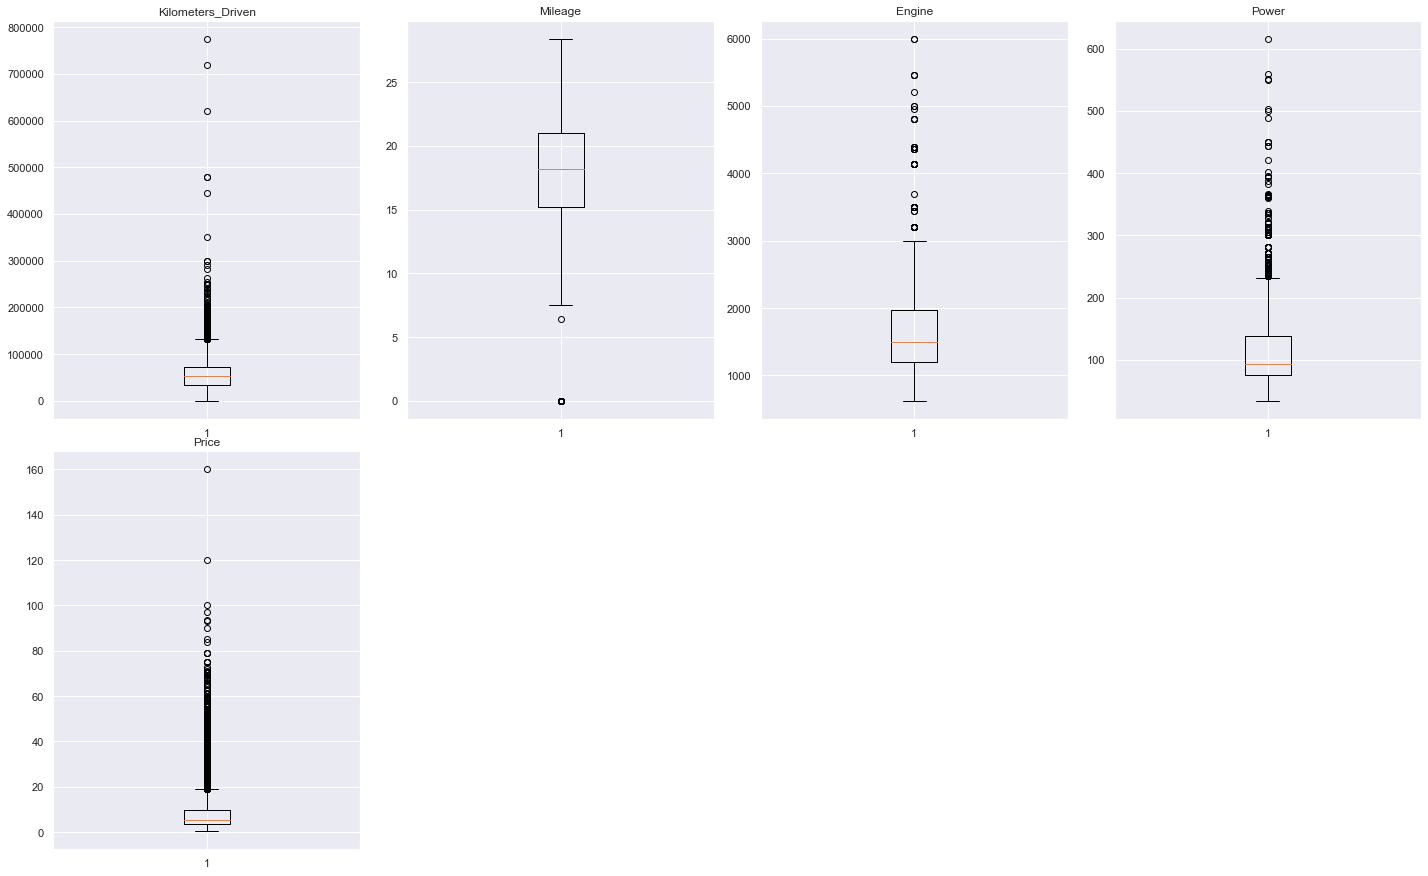

In [1056]:
# outlier detection using boxplot
numeric_columns = dfn.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(dfn[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

**Observations:**
   
   -There are more Outliers in Engine, Power and Kilometers Driven. All Skewed right
   - Just 2 in Mileage.  Mileage is skewed left
   

**Correlations**

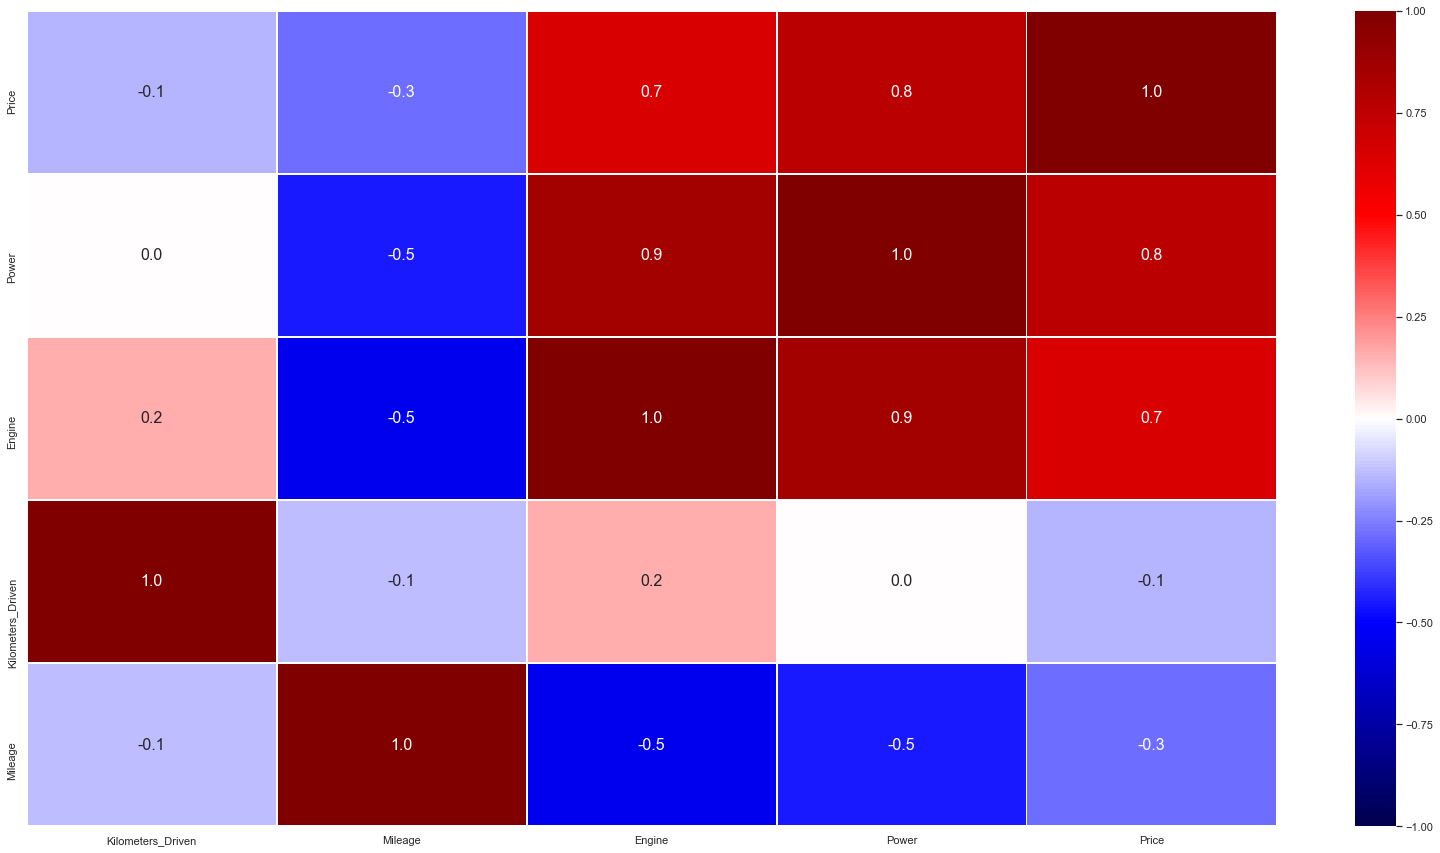

In [1057]:
# N_col = df2.select_dtypes(include=np.number).columns.tolist()
# sns.heatmap(df2[N_col])
# sns.pairplot(df2[N_col])
numeric_columns = dfn.select_dtypes(include=np.number).columns.tolist()
corr = dfn[numeric_columns].corr().sort_values(by=['Price'],ascending=False) # sorting correlations w.r.t Price


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(28, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7,annot_kws={'size':16});#, cbar_kws={"shrink": .01});

Observations:
- Some of the Features shows correlation.
- Engine correlates to Power, ~0.9, Price also Correlates to Engine, ~0.7. as well it correlates to Power. Which is expected
- Price is positively correlated to Engine, ~0.7. 
- Price is positively correlated to Power, ~0.8


**Pair Plots of Features that Used in Correlation Heat Map**

<Figure size 7200x7200 with 0 Axes>

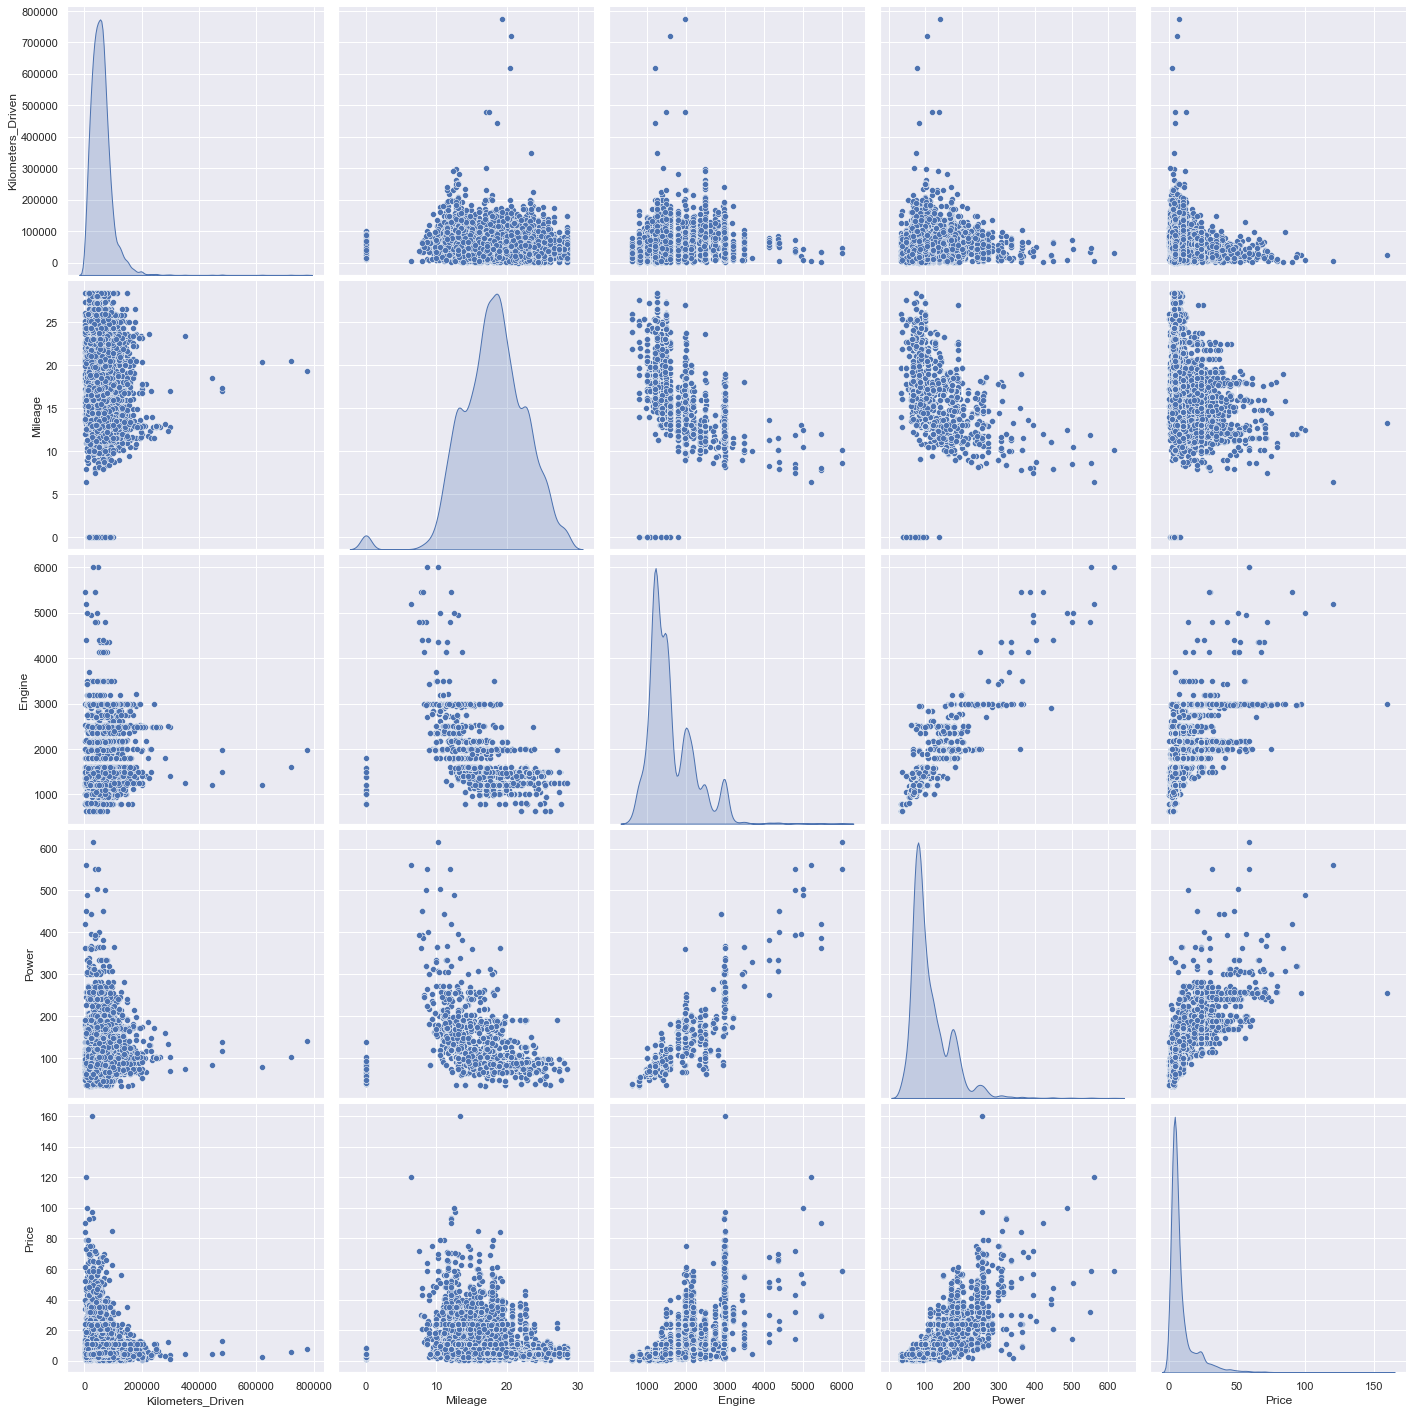

In [1058]:
# Lets look visualize the relationship 
# plt.figure(figsize=(50,50))
# Change seaborn plot size
plt.figure(figsize=(100,100))
sns.pairplot(dfn[numeric_columns],height=4,diag_kind='kde');

Observations:
- Visualizing the numerical columns, shows that Power is also positively/linearly correlated to Engine
- Price is also correlated to Power and Engine
- Mileage looks visualy correlated negatively to Engine and Power.  However, the correlation is not of a high magnitude

In [1059]:
# df1_backup.columns

**Price Vs Engine Scatter Plot, with Transmission**

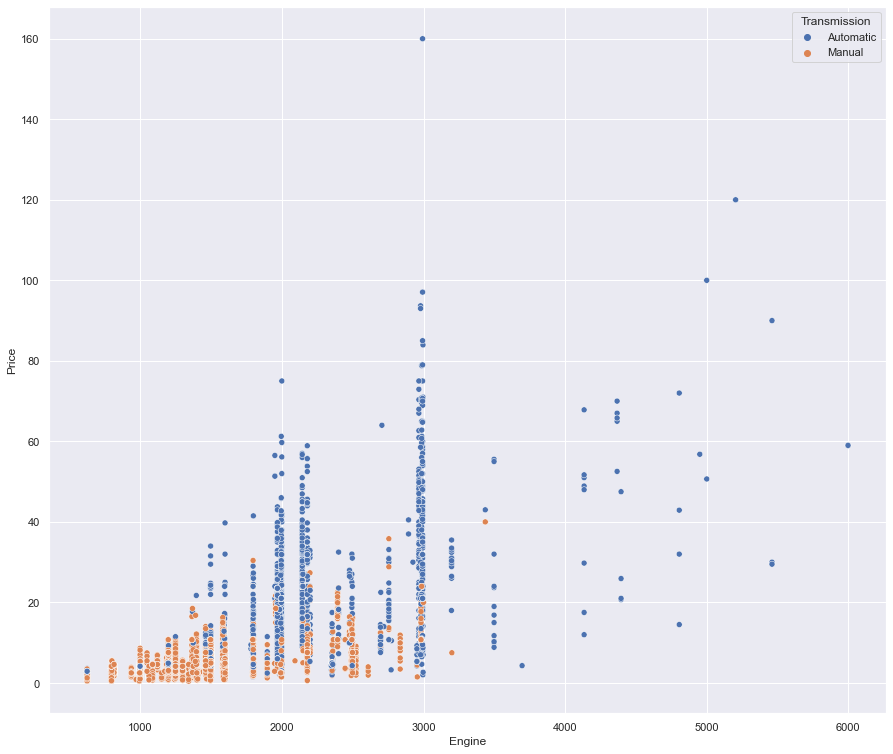

In [1060]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Engine', hue='Transmission', data=dfn);

Observations:
- The scatter plot, shows a slight linear correlation between the Price adn Engine.
- The used cars with larger displacement volume have high counts for Automatic Transmission
- Low to Mid Transmissions appears for both the Automatic and Manual cars when comparing the Price vs Engine

**Price Vs Power Scatter Plot, with Transmission**

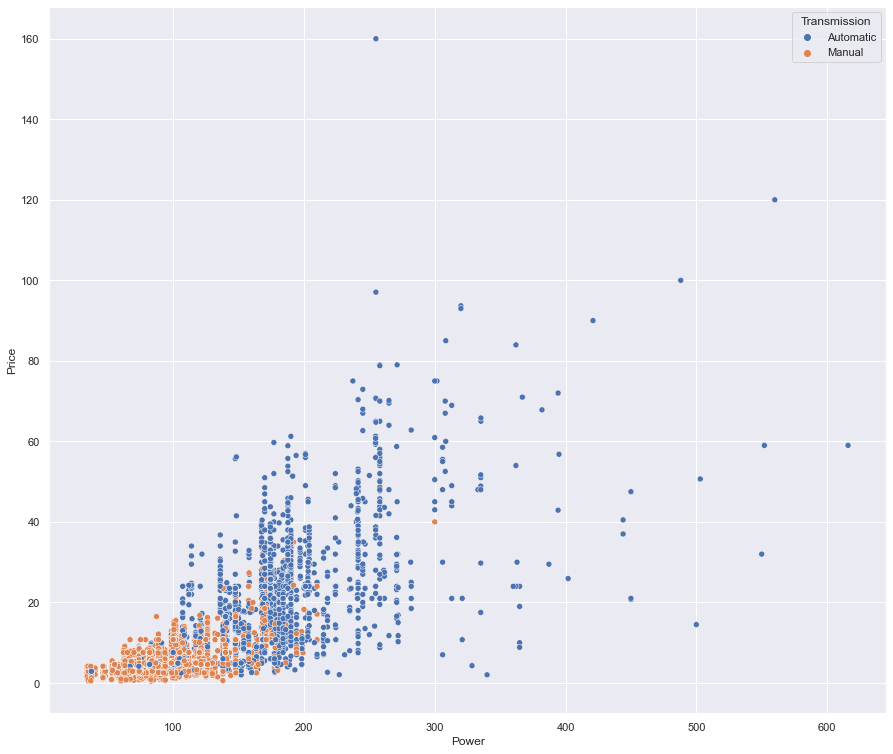

In [1061]:
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Power', hue='Transmission', data=dfn);

Observations:

- The scatter plot, shows a slight positive linear correlation between the Price and Power.
- The used cars with break horsepower are more in Automatic Transmission
- Low to Mid Transmissions appears for both the Automatic and Manual cars when comparing the Price vs Power
- There is one used car that has as high as 300 bhp. This might be an outlier? 

## Ouliers Treatment

In [1062]:
# # Lets treat outliers by flooring and capping (using IQR)
# def treat_outliers(dt,col):
#     '''
#     treats outliers in a varaible
#     col: str, name of the numerical varaible
#     dt: data frame
#     col: name of the column
#     '''
#     Q1=dt[col].quantile(0.25) # 25th quantile
#     Q3=dt[col].quantile(0.75)  # 75th quantile
#     IQR=Q3-Q1
#     Lower_Whisker = Q1 - 1.5*IQR 
#     Upper_Whisker = Q3 + 1.5*IQR
#     dt[col] = np.clip(dt[col], Lower_Whisker, Upper_Whisker)
#     # np.clip : Given an interval, values outside the interval are clipped to the interval edges. 
#     # For example, if an interval of [0, 1] is specified, values smaller than 0 become 0, 
#     # and values larger than 1 become 1.
#     # all the values samller than Lower_Whisker will be assigned value of Lower_whisker                                                   
#     # and all the values above upper_whishker will be assigned value of upper_Whisker 
#     return df

# def treat_outliers_all(dt, col_list):
#     '''
#     treat outlier in all numerical varaibles
#     col_list: list of numerical varaibles
#     dt: data frame
#     '''
#     for c in col_list:
#         print(c)
#         dt = treat_outliers(dt,c)
        
#     return dt

In [1063]:
# numerical_col = df1_backup.select_dtypes(include=np.number).columns.tolist()
# # e1=df1['Price_log'].quantile(0.25)
# # e3=df1['Price_log'].quantile(0.75)
# # IQR=e3-e1
# # l1= e1 - 1.5*IQR
# # l2= e3 + 1.5*IQR
# # print('Q1=',e1,'Q3=',e3,"IQR=",IQR,'Lower_Whisker=',l1,'U_Whisker',l2)
# # numerical_col
# df1_backup = treat_outliers_all(df1_backup,numerical_col)

q1= dfn['Kilometers_Driven'].quantile(0.10)
q3= dfn['Kilometers_Driven'].quantile(0.90)
iqr = q3-q1
L_Whisker = abs(q1 - 1.5*iqr )
U_Whisker = q3 + 1.5*iqr
print(L_Whisker,U_Whisker)
dfxx["Kilometers_Driven"] = np.where(dfn["Kilometers_Driven"] <L_Whisker, 
                                           L_Whisker,dfxx["Kilometers_Driven"])
dfxx["Kilometers_Driven"] = np.where(dfn["Kilometers_Driven"] >U_Whisker, U_Whisker,
                                           dfn["Kilometers_Driven"])

95500.0 212500.0


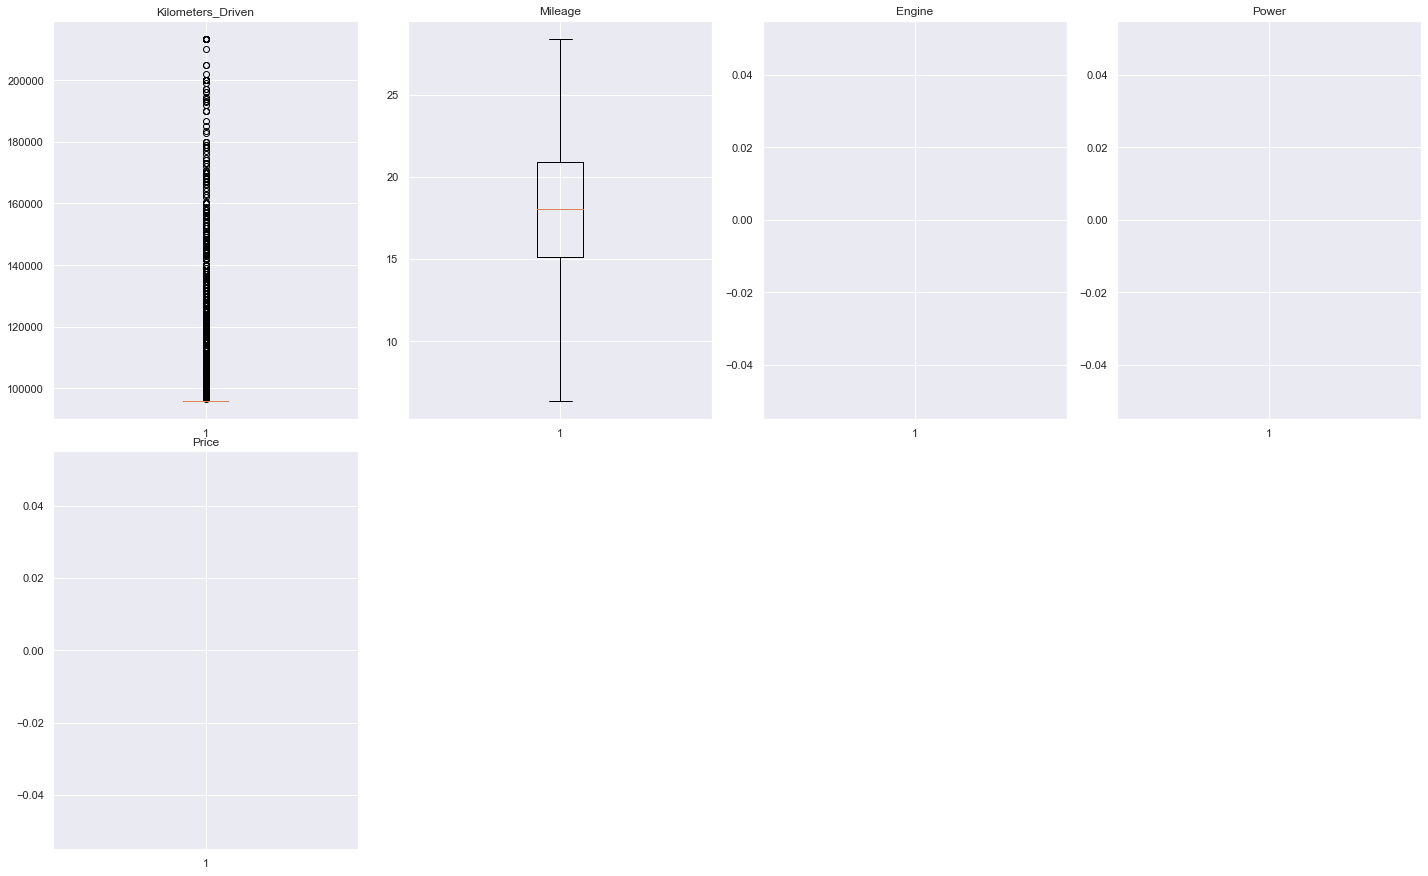

In [1064]:
# lets look at box plot to see if outliers has been treated or not
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df1_backup[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [1065]:
# df1_backup.info()

In [1066]:
# from scipy.stats import norm
# # numeric_columns = df1_backup.select_dtypes(include=np.number).columns.tolist()
# numeric_columns= ['Kilometers_Driven',
#  'Mileage',
#  'Engine',
#  'Power',
#  'Price']
# plt.figure(figsize=(17,75))

# for i in range(len(numeric_columns)):
#     plt.subplot(18,2,i+1)
# #     plt.hist(df[all_col[i]])
#     sns.boxplot(df1_backup[numeric_columns[i]])
# #     sns.displot(df[all_col[i]], kde=True)
#     plt.tight_layout()
#     plt.title(numeric_columns[i],fontsize=25)
    

# plt.show()

In [1067]:
# df1_backup['Kilometers_Driven'].describe()

<AxesSubplot:xlabel='Kilometers_Driven'>

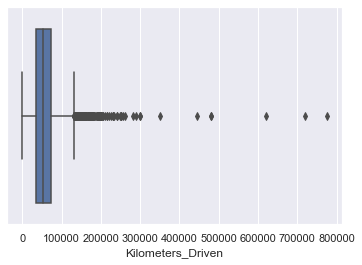

In [1068]:
sns.boxplot(dfn.Kilometers_Driven)

In [1069]:
dfn['Kilometers_Driven'].describe()

count      7168.000000
mean      57671.568359
std       37423.526349
min         171.000000
25%       33982.750000
50%       53200.500000
75%       73000.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

In [1070]:
# dfxx=dfn.copy()

In [1071]:
# dfxx.describe()

In [1072]:
# # OUtlier in Kilometers_Driven still present

# q1= df1_backup['Kilometers_Driven'].quantile(0.10)
# q3= df1_backup['Kilometers_Driven'].quantile(0.90)
# iqr = q3-q1
# L_Whisker = abs(q1 - 1.5*iqr )
# U_Whisker = q3 + 1.5*iqr
# # print(L_Whisker,U_Whisker)

# df1_backup["Kilometers_Driven"] = np.where(df1_backup["Kilometers_Driven"] <L_Whisker, 
#                                            L_Whisker,df1_backup["Kilometers_Driven"])
# df1_backup["Kilometers_Driven"] = np.where(df1_backup["Kilometers_Driven"] >U_Whisker, U_Whisker,
#                                            df1_backup["Kilometers_Driven"])

### Log transformation
- The Price and Kilometers Driven will be log-transformed

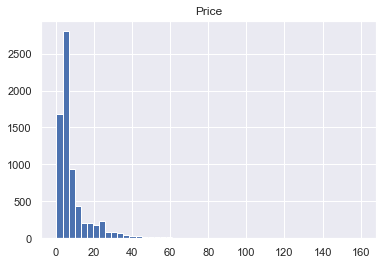

0


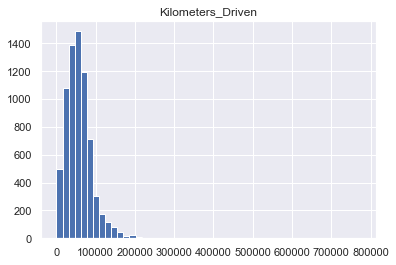

0


In [1073]:
cols_to_log = ['Price', 'Kilometers_Driven']
for colname in cols_to_log:
    plt.hist(dfn[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(dfn[colname] <= 0))

In [1074]:
#Perform Log Transformation
for colname in cols_to_log:
    dfn[colname + '_log'] = np.log(dfn[colname])
dfn.drop(cols_to_log, axis=1, inplace=True)

In [1075]:
dfn.columns#

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage',
       'Engine', 'Power', 'Seats', 'Brand', 'Model', 'Year_Binned',
       'Price_log', 'Kilometers_Driven_log'],
      dtype='object')

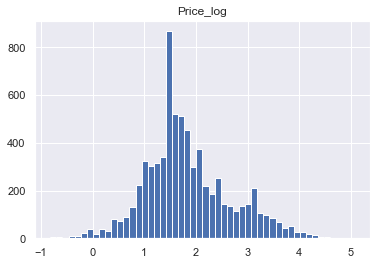

89


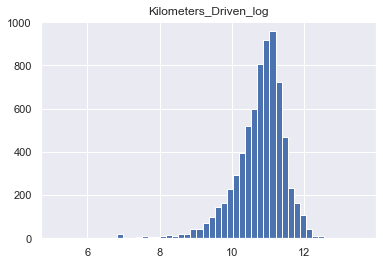

0


In [1076]:
cols_to_log = ['Price_log', 'Kilometers_Driven_log']
for colname in cols_to_log:
    plt.hist(dfn[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(dfn[colname] <= 0))

In [1077]:
dfn.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7168 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               7168 non-null   category
 1   Fuel_Type              7168 non-null   category
 2   Transmission           7168 non-null   category
 3   Owner_Type             7168 non-null   object  
 4   Mileage                7168 non-null   float64 
 5   Engine                 7168 non-null   float64 
 6   Power                  7168 non-null   float64 
 7   Seats                  7168 non-null   category
 8   Brand                  7168 non-null   object  
 9   Model                  7168 non-null   object  
 10  Year_Binned            7168 non-null   category
 11  Price_log              7168 non-null   float64 
 12  Kilometers_Driven_log  7168 non-null   float64 
dtypes: category(5), float64(5), object(3)
memory usage: 540.3+ KB


In [1085]:
cat_col = dfn.select_dtypes(include='category').columns.tolist()
dfn= pd.get_dummies(dfn, columns=cat_col, drop_first=True)
dfn.sample(10)


,Owner_Type,Mileage,Engine,Power,Brand,Model,Price_log,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Year_Binned_2000 - 2004,Year_Binned_2004 - 2008,Year_Binned_2008 - 2012,Year_Binned_2012 - 2016,Year_Binned_2016 - 2020
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1195,First,22.690000,1995.0,190.00,BMW,3 Series 320d Luxury Line,2.639057,11.082143,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
843,First,23.100000,998.0,67.04,Maruti,Celerio VXI AT,1.481605,10.417807,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1883,Second,10.800000,2354.0,152.00,Honda,CR-V 2.4 MT,1.547563,11.492723,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
4597,First,19.810000,1086.0,68.05,Hyundai,i10 Era 1.1 iTech SE,0.641854,11.193711,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0
2743,Second,16.000000,2179.0,140.00,Mahindra,XUV500 W8 2WD,2.484907,11.238489,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
6855,First,17.150000,1995.0,147.90,Renault,Koleos 4X2 MT,1.702928,11.434402,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
6788,First,0.022969,998.0,58.20,Maruti,Alto K10 LXI CNG Optional,1.423108,10.404263,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
5697,First,21.380000,1396.0,88.70,Hyundai,Creta 1.4 CRDi S Plus,2.327278,10.373491,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4402,First,17.800000,1497.0,117.30,Honda,City i VTEC VX,1.938742,10.571317,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [1089]:
# Get dummies of Brand
dfn= pd.get_dummies(dfn, columns=['Brand'], drop_first=True)
dfn.sample(3)

In [1090]:
# Get dummies of Owner_Type
dfn= pd.get_dummies(dfn, columns=['Owner_Type'], drop_first=True)
dfn.sample(3)

,Mileage,Engine,Power,Model,Price_log,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Year_Binned_2000 - 2004,Year_Binned_2004 - 2008,Year_Binned_2008 - 2012,Year_Binned_2012 - 2016,Year_Binned_2016 - 2020,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5989,18.25,1968.0,187.74,A4 35 TDI Premium Plus,2.804572,10.978985,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,15.20,1968.0,140.80,A4 New 2.0 TDI Multitronic,2.875822,10.613246,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2066,18.49,1493.0,100.00,TUV 300 T8,1.938742,10.758647,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1108]:
dfm=dfn.copy()

In [1111]:
# dfm.info()

In [1113]:
# dfm[dfm['Price_log']==0].drop()
# # df.drop(df[df['Age'] < 25].index, inplace = True)
# dfm.drop(dfm[dfm['Price_log'] ==0].index, inplace = True)
# dfm[dfm['Price_log']==0]

In [1114]:
# dfn[dfn['Price_log']==0].drop()
# df.drop(df[df['Age'] < 25].index, inplace = True)
dfn.drop(dfn[dfn['Price_log'] ==0].index, inplace = True)
dfn[dfn['Price_log']==0]

,Mileage,Engine,Power,Model,Price_log,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Year_Binned_2000 - 2004,Year_Binned_2004 - 2008,Year_Binned_2008 - 2012,Year_Binned_2012 - 2016,Year_Binned_2016 - 2020,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### Start Modelling

In [1115]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7153 entries, 0 to 7252
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Mileage                    7153 non-null   float64
 1   Engine                     7153 non-null   float64
 2   Power                      7153 non-null   float64
 3   Model                      7153 non-null   object 
 4   Price_log                  7153 non-null   float64
 5   Kilometers_Driven_log      7153 non-null   float64
 6   Location_Bangalore         7153 non-null   uint8  
 7   Location_Chennai           7153 non-null   uint8  
 8   Location_Coimbatore        7153 non-null   uint8  
 9   Location_Delhi             7153 non-null   uint8  
 10  Location_Hyderabad         7153 non-null   uint8  
 11  Location_Jaipur            7153 non-null   uint8  
 12  Location_Kochi             7153 non-null   uint8  
 13  Location_Kolkata           7153 non-null   uint8

In [1116]:
#Defining X and y variables
X = dfn.drop(['Price_log','Model'], axis=1) #independent variables0
y = dfn[['Price_log']] #dependent variable

print(X.head())
print(y.head())

         Mileage  Engine   Power  Kilometers_Driven_log  Location_Bangalore  \
S.No.                                                                         
0       0.018939   998.0   58.16              11.184421                   0   
1      19.670000  1582.0  126.20              10.621327                   0   
2      18.200000  1199.0   88.70              10.736397                   0   
3      20.770000  1248.0   88.76              11.373663                   0   
4      15.200000  1968.0  140.80              10.613246                   0   

       Location_Chennai  Location_Coimbatore  Location_Delhi  \
S.No.                                                          
0                     0                    0               0   
1                     0                    0               0   
2                     1                    0               0   
3                     1                    0               0   
4                     0                    1               0  

In [1117]:
print(X.shape)
print(y.shape)

(7153, 63)
(7153, 1)


In [1118]:
#split the data into train and test
X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1119]:
y_train.sample(y_train.shape[0])

,Price_log
S.No.,
4500,1.029619
3981,2.174752
2748,2.693951
5742,1.504077
382,3.277145
1621,0.920283
4537,2.602690
461,1.790091
2427,1.252763


In [1120]:
X_train.head()

,Mileage,Engine,Power,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Year_Binned_2000 - 2004,Year_Binned_2004 - 2008,Year_Binned_2008 - 2012,Year_Binned_2012 - 2016,Year_Binned_2016 - 2020,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5909,12.55,2982.0,168.50,11.407565,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5846,17.92,1086.0,62.10,11.002100,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
111,15.10,1196.0,73.00,10.546735,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1784,18.90,1197.0,81.86,10.669908,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5076,22.07,1199.0,73.90,10.714418,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Choose Model, Train and Evaluate

In [1121]:
#Fitting linear model
lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train, y_train)  

LinearRegression()

**Here are the coefficients for each variable and the intercept**

In [1129]:
# let us check the coefficients and intercept of the model
# coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
#                        index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
# print(coef_df)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lin_reg_model.coef_[0][idx]))

The coefficient for Mileage is -0.008815587512513084
The coefficient for Engine is 0.0001307538266502277
The coefficient for Power is 0.005062543282140203
The coefficient for Kilometers_Driven_log is -0.10990715654241623
The coefficient for Location_Bangalore is 0.10769719903264278
The coefficient for Location_Chennai is 0.03535921109727969
The coefficient for Location_Coimbatore is 0.1190202426239278
The coefficient for Location_Delhi is -0.07487584469313965
The coefficient for Location_Hyderabad is 0.08429318020407528
The coefficient for Location_Jaipur is -0.04209617768146658
The coefficient for Location_Kochi is 0.01645768049398773
The coefficient for Location_Kolkata is -0.23161284115306718
The coefficient for Location_Mumbai is -0.06806403928497291
The coefficient for Location_Pune is -0.029851960836544907
The coefficient for Fuel_Type_Diesel is 0.48923232277379813
The coefficient for Fuel_Type_LPG is 0.06924235356459474
The coefficient for Fuel_Type_Petrol is 0.24197110699066374

In [1130]:
intercept = lin_reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1.0538424875504955


In [1123]:
# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [1124]:
 #Checking model performance on train set
print('Training Performance\n')
print(model_perf(lin_reg_model, X_train, y_train))

Training Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  0.298372  0.223644  11.131276  0.867933       0.86625


In [1125]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model, X_test, y_test))

Test Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  0.305153  0.231058  13.797018  0.870446      0.866526


Observations:

- R^2 (coefficient of determination) regression score function.

- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

- R^2 value is 0.866 which means that in this model independent variables are able to explain 86.6% of variances in dependent variable
- The training and testing RMSE are 0.298 and 0.305 respectively, and both scores are comparable. Hence, the model is a good fit.

- R2_score is 0.866, that explains 86.6% of total variation in the dataset. So, overall the model is very satisfactory.
- Train and test R2_score is less than 0.03, ~0.01

### Multicollinearity using VIF scores

In [1131]:
# to compute VIF, we first have to add a constant column having value 1 to our input variables

X1 = X.copy()
X1['const'] = 1
X1.head()

,Mileage,Engine,Power,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Year_Binned_2000 - 2004,Year_Binned_2004 - 2008,Year_Binned_2008 - 2012,Year_Binned_2012 - 2016,Year_Binned_2016 - 2020,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,const
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.018939,998.0,58.16,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,19.670000,1582.0,126.20,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,18.200000,1199.0,88.70,10.736397,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,20.770000,1248.0,88.76,11.373663,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,15.200000,1968.0,140.80,10.613246,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [1132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Mileage                          4.694927
Engine                          11.297753
Power                            9.760136
Kilometers_Driven_log            1.865907
Location_Bangalore               2.499976
Location_Chennai                 2.981352
Location_Coimbatore              3.575750
Location_Delhi                   3.181549
Location_Hyderabad               3.779332
Location_Jaipur                  2.700929
Location_Kochi                   3.583363
Location_Kolkata                 3.192926
Location_Mumbai                  4.046294
Location_Pune                    3.470020
Fuel_Type_Diesel                66.027039
Fuel_Type_LPG                    1.210092
Fuel_Type_Petrol                53.942255
Transmission_Manual              2.251295
Seats_2.0                       18.297287
Seats_4.0                      116.846168
Seats_5.0                      974.419565
Seats_6.0                       37.475297
Seats_7.0                      717.544282

*  Engine, Power are both greater than 5. Both were correlated during the EDA process
*  Fuel_Type_Diesel, Fuel_Type_Petrol, Seats_2.0, Seats_4.0, Seats_5.0, Seats_6.0, Seats_7.0, Seats_8.0, and Seats_10.0 are all greater than 5
* All the Year_Binned are also greater tha 5
* Brand_Maruti and Brand_Hyundai are the highest with 1092 and 1180

## Removing Multicollinearity
To remove multicollinearity
  1. Drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 5

In [1144]:
# Method to drop all the multicollinear columns and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test, y_train, y_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        
        model = LinearRegression(fit_intercept=False)
        model.fit(train, y_train)
        # Adj R-Sq
        adj_rsq_scores.append(adj_r2(train, y_train, model.predict(train)))
        # RMSE (Test data)
        y_pred_test_Price = model.predict(test)
        y_test_Price = y_test
        rmse_test_data.append(np.sqrt(mean_squared_error(y_pred_test_Price, y_test_Price)))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)

In [1145]:
high_vif_columns = ["Engine","Brand_Volvo","Brand_Volkswagen","Brand_Toyota",
                   'Brand_Tata','Brand_Skoda','Brand_Renault', 'Brand_Porsche',
                   'Brand_Nissan','Brand_Mitsubishi','Brand_Mini','Brand_Mercedes-Benz',
                   'Brand_Maruti','Brand_Mahindra','Brand_Land','Brand_Jeep',
                   'Brand_Jaguar','Brand_Hyundai','Brand_Honda','Brand_Ford','Brand_Fiat',
                   'Brand_Datsun','Brand_Chevrolet','Brand_BMW','Brand_Audi','Year_Binned_2000 - 2004',
                   'Year_Binned_2004 - 2008','Year_Binned_2008 - 2012','Year_Binned_2012 - 2016',
                    'Year_Binned_2016 - 2020','Seats_10.0','Seats_8.0','Seats_7.0','Seats_6.0','Seats_5.0',
                   'Seats_4.0','Seats_2.0','Fuel_Type_Petrol','Fuel_Type_Diesel','Power']
        

X_train1 = X_train.copy()
X_train1['constant'] = 1

X_test1 = X_test.copy()
X_test1['constant'] = 1

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                        col  Adj_rsq_after_dropping_col  Test RMSE
18              Brand_Honda                    0.866250   0.305151
5               Brand_Skoda                    0.866250   0.305156
17            Brand_Hyundai                    0.866249   0.305145
12             Brand_Maruti                    0.866249   0.305146
2          Brand_Volkswagen                    0.866249   0.305144
6             Brand_Renault                    0.866248   0.305142
19               Brand_Ford                    0.866248   0.305143
31                Seats_8.0                    0.866248   0.305158
32                Seats_7.0                    0.866248   0.305153
8              Brand_Nissan                    0.866247   0.305141
13           Brand_Mahindra                    0.866246   0.305135
33                Seats_6.0                    0.866245   0.305129
9          Brand_Mitsubishi                    0.866242   0.305140
34                Seats_5.0                    0.866240   0.30

- There is no great significant change when features are dropped. 
- However, dropping Power would have the maximum impact on the prediction of the model when all variables are compared

In [1146]:
X_train2 = X_train1.drop('Power', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Mileage                          4.756410
Engine                           5.650012
Kilometers_Driven_log            1.877023
Location_Bangalore               2.552726
Location_Chennai                 2.926690
Location_Coimbatore              3.606665
Location_Delhi                   3.254547
Location_Hyderabad               3.803257
Location_Jaipur                  2.765936
Location_Kochi                   3.729140
Location_Kolkata                 3.197648
Location_Mumbai                  4.061316
Location_Pune                    3.496337
Fuel_Type_Diesel                65.230072
Fuel_Type_LPG                    1.162479
Fuel_Type_Petrol                52.472552
Transmission_Manual              2.231824
Seats_2.0                       11.229408
Seats_4.0                       89.709234
Seats_5.0                      689.254525
Seats_6.0                       27.531854
Seats_7.0                      501.734818
Seats_8.0                      122.904513

- dropping the Power, does bring down the highest Brand_Maruti from 1180 to 855, almost 27% improvement

Let's drop the highest, Brand_Maruti

In [1147]:
high_vif_columns = ["Brand_Maruti","Brand_Hyundai"]

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

             col  Adj_rsq_after_dropping_col  Test RMSE
1  Brand_Hyundai                    0.866249   0.305145
0   Brand_Maruti                    0.866249   0.305146


In [1148]:
# We'll drop Brand_Maruti and check the vif again

X_train3 = X_train2.drop('Brand_Maruti', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Mileage                         4.744715
Engine                          5.648757
Kilometers_Driven_log           1.876286
Location_Bangalore              2.552726
Location_Chennai                2.925775
Location_Coimbatore             3.606659
Location_Delhi                  3.254534
Location_Hyderabad              3.803248
Location_Jaipur                 2.765870
Location_Kochi                  3.729134
Location_Kolkata                3.197648
Location_Mumbai                 4.061310
Location_Pune                   3.496170
Fuel_Type_Diesel               65.120977
Fuel_Type_LPG                   1.162468
Fuel_Type_Petrol               52.415832
Transmission_Manual             2.231742
Seats_2.0                      11.229398
Seats_4.0                      89.708444
Seats_5.0                     689.250969
Seats_6.0                      27.531750
Seats_7.0                     501.728072
Seats_8.0                     122.902367
Seats_9.0             

In [1149]:
# previous drops helped.
# We'll drop more higher features and check the vif again

X_train4 = X_train3.drop(['Year_Binned_2016 - 2020','Year_Binned_2012 - 2016','Year_Binned_2008 - 2012',
                         'Year_Binned_2004 - 2008','Year_Binned_2000 - 2004'], axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train4.values,i) for i in range(X_train4.shape[1])],index=X_train4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

Mileage                         4.416657
Engine                          5.593149
Kilometers_Driven_log           1.406689
Location_Bangalore              2.547996
Location_Chennai                2.922794
Location_Coimbatore             3.526562
Location_Delhi                  3.249517
Location_Hyderabad              3.800010
Location_Jaipur                 2.756313
Location_Kochi                  3.632191
Location_Kolkata                3.190236
Location_Mumbai                 4.058409
Location_Pune                   3.493460
Fuel_Type_Diesel               62.579412
Fuel_Type_LPG                   1.159565
Fuel_Type_Petrol               49.662985
Transmission_Manual             2.184315
Seats_2.0                      11.222007
Seats_4.0                      89.648509
Seats_5.0                     688.959738
Seats_6.0                      27.521971
Seats_7.0                     501.483398
Seats_8.0                     122.834793
Seats_9.0             

In [1150]:
# previous drops helped.
# We'll drop more higher features and check the vif again

X_train5 = X_train4.drop(['Seats_10.0','Seats_8.0','Seats_7.0','Seats_6.0','Seats_5.0','Seats_4.0',
                          'Seats_2.0','Fuel_Type_Petrol','Fuel_Type_Diesel'], axis=1)
vif_series4 = pd.Series([variance_inflation_factor(X_train5.values,i) for i in range(X_train5.shape[1])],index=X_train5.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series4))

Series before feature selection: 

Mileage                        1.587839
Engine                         3.246693
Kilometers_Driven_log          1.270619
Location_Bangalore             2.546811
Location_Chennai               2.919580
Location_Coimbatore            3.521180
Location_Delhi                 3.246025
Location_Hyderabad             3.792381
Location_Jaipur                2.750797
Location_Kochi                 3.623640
Location_Kolkata               3.188509
Location_Mumbai                4.050162
Location_Pune                  3.489569
Fuel_Type_LPG                  1.051784
Transmission_Manual            2.127484
Seats_9.0                      1.007257
Brand_Audi                     1.719620
Brand_BMW                      1.799555
Brand_Bentley                  1.083197
Brand_Chevrolet                1.087546
Brand_Datsun                   1.015713
Brand_Fiat                     1.027315
Brand_Force                    1.011419
Brand_Ford                     1.240151
Brand

- Model looks better now, all Features are less than 5.
Let's compare the new R^2 values

In [1151]:
lin_reg_model1 = LinearRegression(fit_intercept=False)
lin_reg_model1.fit(X_train5,y_train)

print('Training Performance\n')
print(model_perf(lin_reg_model1, X_train5, y_train))

Training Performance

       RMSE       MAE       MAPE       R^2  Adjusted R^2
0  0.389685  0.301488  13.179985  0.774729      0.772548


**Observations**

- Earlier R-squared was 0.866, now it is reduced to 0.772 - looks like our original model performs better.
- Now Adjusted R-squared is 0.773, Our modified model is able to explain 77.2% of variance.
- The Adjusted-R squared in initial model (lin_reg_model) it was 86.6% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much.

Mean Residuals

In [1153]:
# predicted values
fitted = lin_reg_model1.predict(X_train5)
residual = fitted - y_train.values

np.mean(residual)

-3.1021498309797863e-15

In [1155]:
# predicted values
fitted = lin_reg_model.predict(X_train)
residual = fitted - y_train.values

np.mean(residual)

2.547282226261993e-16

Observation:
   * Both the original model and the model adjusted with dropping features have Mean Residual less than zero

**Linearity Test**

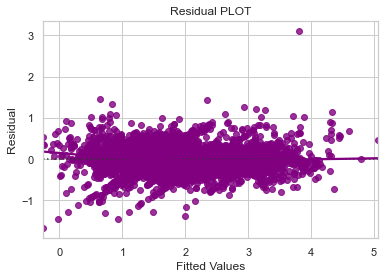

In [1156]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

No pattern in residual plot, hence assumption is satisfied.